### 75.06/95.58 Organización de Datos: Trabajo Práctico 1 ###
#### Primer Cuatrimestre de 2020 ####



In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import STOPWORDS
import string
%matplotlib inline
import plotly.express as px

tweets = pd.read_csv('train.csv') 
tweets.tail()

id keyword location  \
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1

In [327]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [328]:
tweets['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

In [329]:
tweets['location'].describe()

count     5080
unique    3341
top        USA
freq       104
Name: location, dtype: object

In [330]:
tweets['keyword'].describe()

count           7552
unique           221
top       fatalities
freq              45
Name: keyword, dtype: object

In [331]:
duplicados = tweets.duplicated(subset = 'text', keep = False)
duplicados.value_counts()

False    7434
True      179
dtype: int64

In [332]:
tweets.drop_duplicates(subset = 'text', keep = False, inplace = True)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7434 non-null   int64 
 1   keyword   7378 non-null   object
 2   location  4982 non-null   object
 3   text      7434 non-null   object
 4   target    7434 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 348.5+ KB


# DESASTRE (KEYWORDS)

TOP 50 DESASTRES COMENTADOS EN LOS TWEETS

In [333]:
desastres = tweets.groupby("keyword").agg({"target":["count","mean"]})
level0 = desastres.columns.get_level_values(0)
level1 = desastres.columns.get_level_values(1)
desastres.columns = level0 + "_" + level1
desastres.sort_values(by="target_count",ascending = False,inplace = True)
desastres = desastres.head(50) #TOP 50

[]

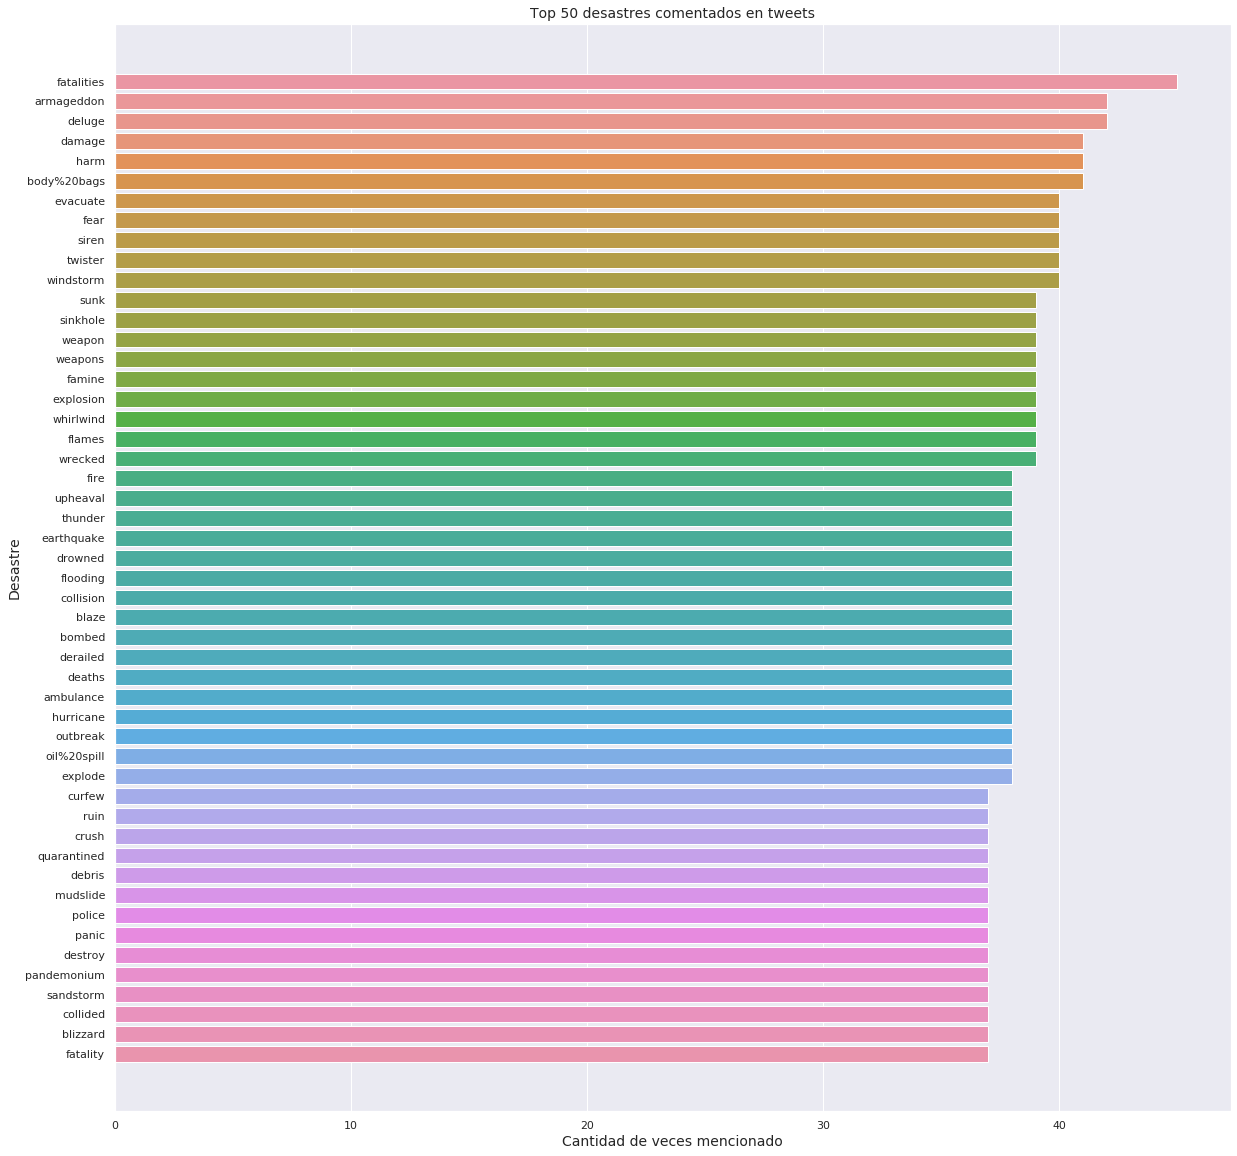

In [334]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = desastres,x = "target_count",y = desastres.index)
grafico.set_title("Top 50 desastres comentados en tweets",fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado",fontsize = 14)
grafico.set_ylabel("Desastre",fontsize = 14)
grafico.plot()

# TOP 50 DESASTRES COMENTADOS EN LOS TWEETS

In [347]:
desastres = tweets.groupby("keyword").agg({"target":["count","mean"]}).copy()
level0 = desastres.columns.get_level_values(0)
level1 = desastres.columns.get_level_values(1)
desastres.columns = level0 + "_" + level1
desastres.sort_values(by="target_count",ascending = False,inplace = True)
desastres = desastres.head(50) #TOP 50

[]

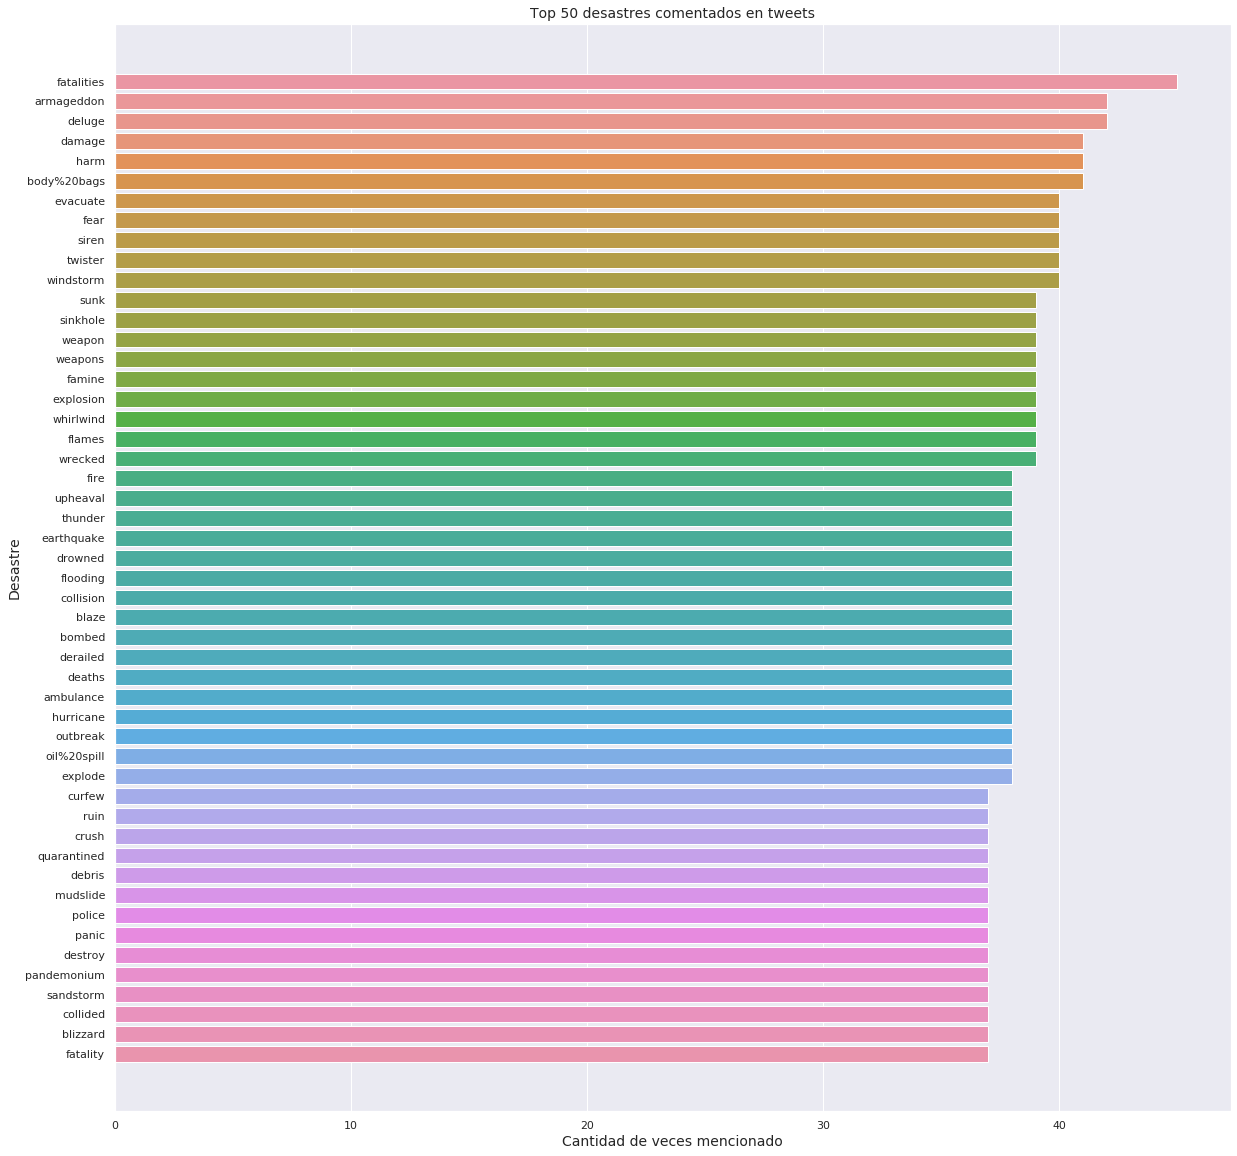

In [348]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = desastres,x = "target_count",y = desastres.index)
grafico.set_title("Top 50 desastres comentados en tweets",fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado",fontsize = 14)
grafico.set_ylabel("Desastre",fontsize = 14)
grafico.plot()

# HASHTAGS

CUALES SON LOS HASHTAG QUE MAS TIENEN LOS REALES/FAKE

In [349]:
tweets['hashtags'] = tweets['text'].str.findall(r'#.*?(?=\s|$)')
tweets_hashtags = tweets.explode('hashtags')
tweets_hashtags.dropna(subset = ["hashtags"],inplace = True)
tweets_hashtags["hashtags"] = tweets_hashtags["hashtags"].str.lower()

In [350]:
true_by_hashtags = tweets_hashtags.groupby("target").get_group(1)
top_true_hashtags = true_by_hashtags.groupby('hashtags').agg({'target':'count'})
top_true_hashtags.sort_values(by="target",ascending = False,inplace = True)
top_true_hashtags.columns = ["true_count"]
top_true_hashtags = top_true_hashtags.head(50)
top_true_hashtags.head(3)

true_count
hashtags              
#news               53
#???                23
#hiroshima          21

[]

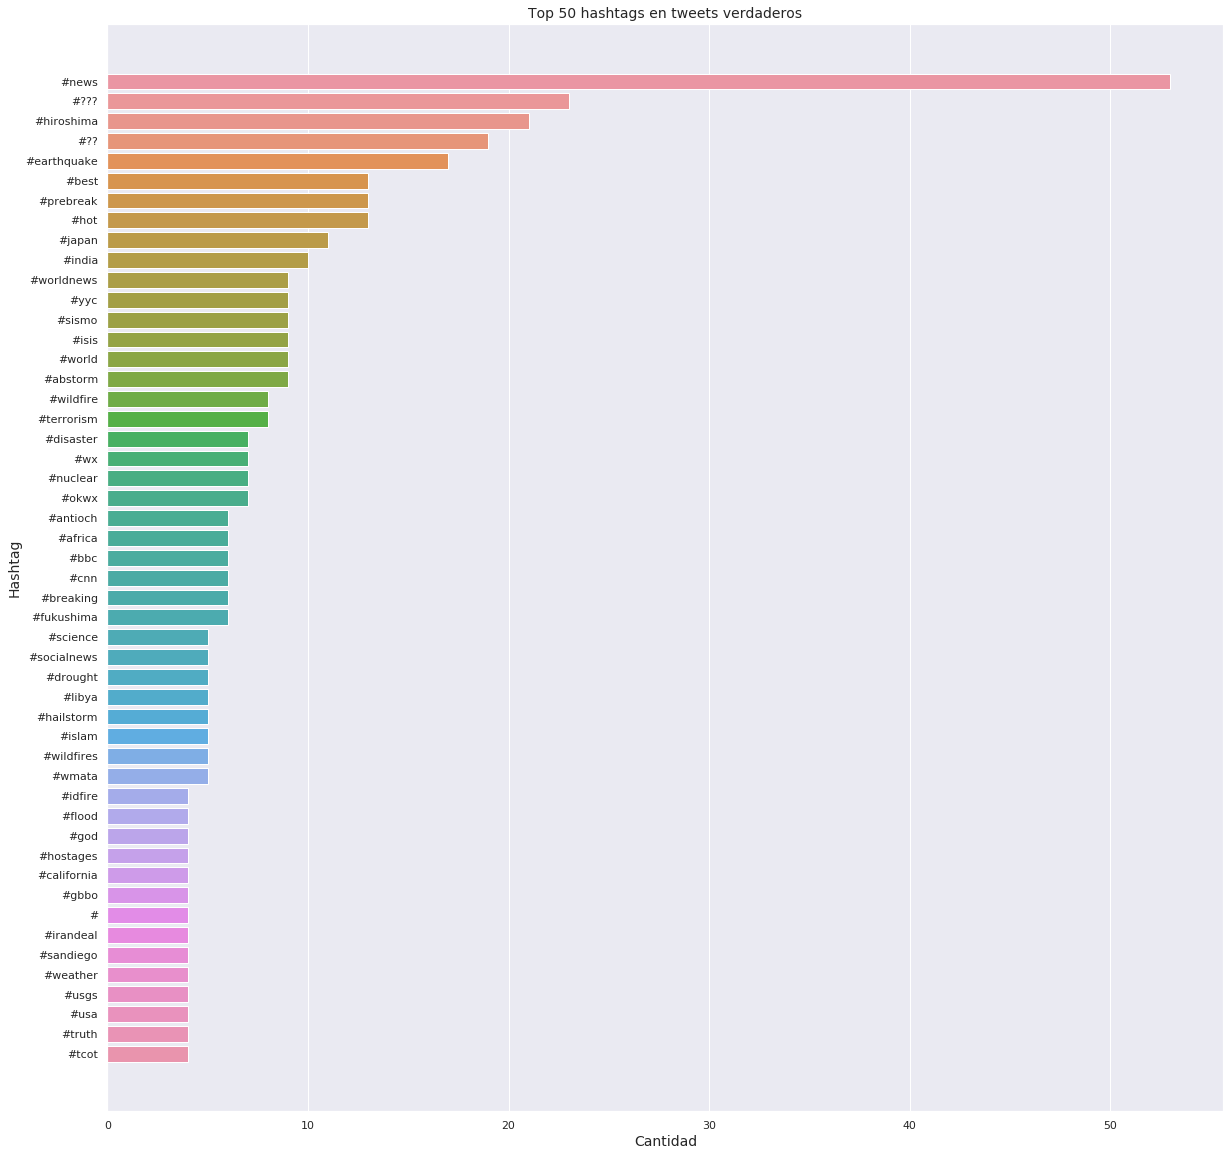

In [351]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = top_true_hashtags,x = "true_count",y = top_true_hashtags.index)
grafico.set_title("Top 50 hashtags en tweets verdaderos",fontsize = 14)
grafico.set_xlabel("Cantidad",fontsize = 14)
grafico.set_ylabel("Hashtag",fontsize = 14)
grafico.plot()

In [352]:
false_by_hashtags = tweets_hashtags.groupby("target").get_group(0)
top_fake_hashtags = false_by_hashtags.groupby('hashtags').agg({'target':'count'})
top_fake_hashtags.sort_values(by="target",ascending = False,inplace = True)
top_fake_hashtags.columns = ["false_count"]
top_fake_hashtags = top_fake_hashtags.head(50)
top_fake_hashtags.head(5)

false_count
hashtags                
#nowplaying           20
#news                 20
#prebreak             17
#hot                  17
#best                 17

[]

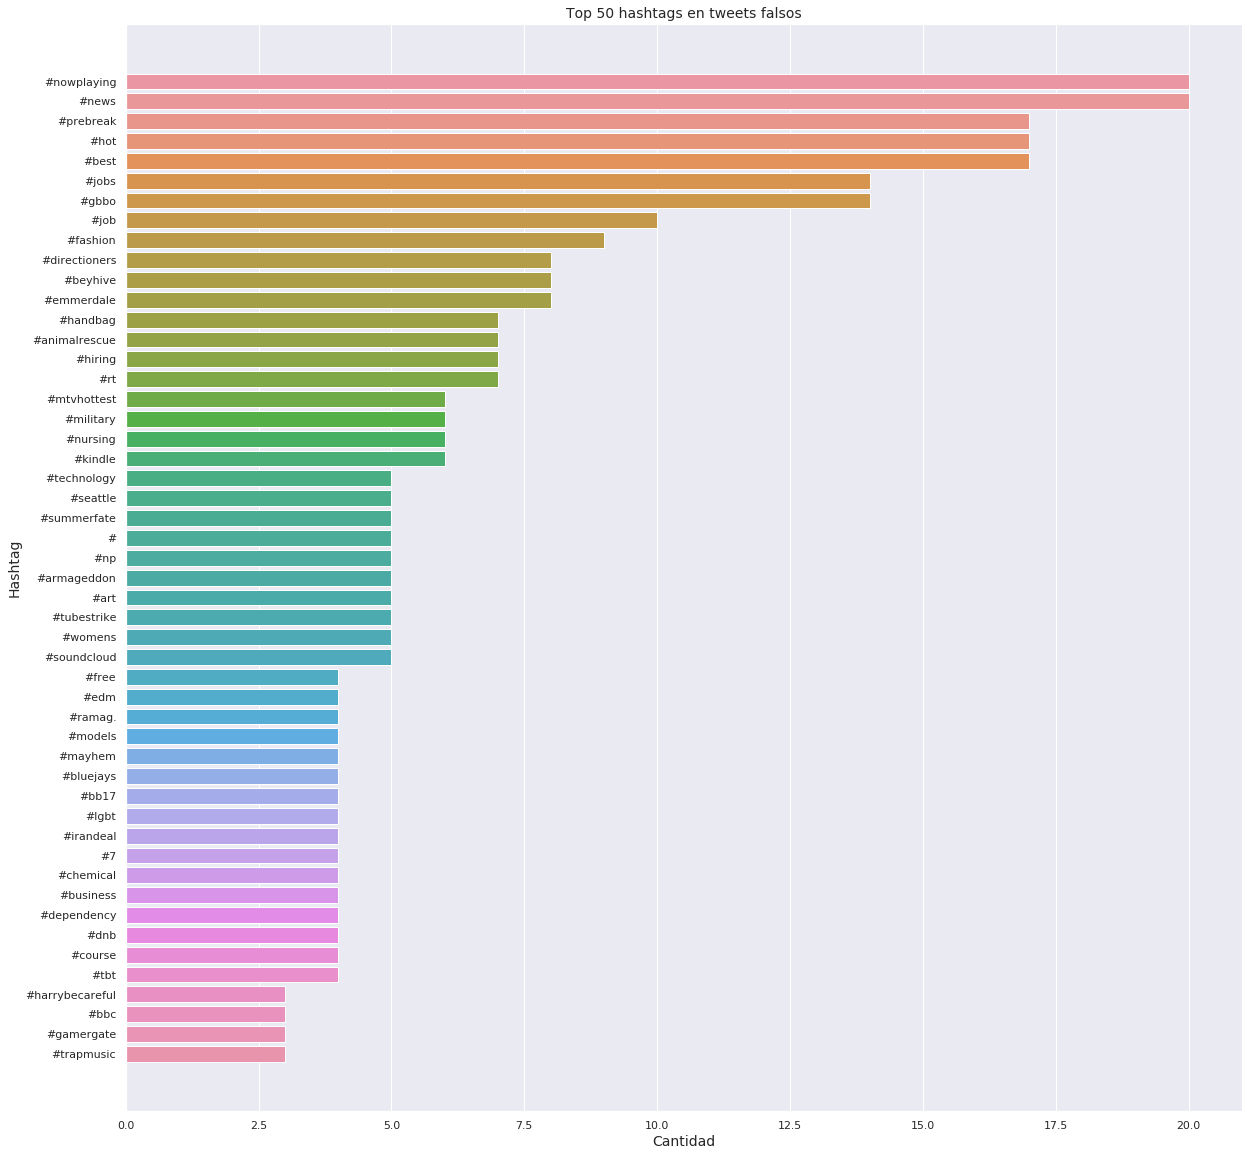

In [353]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = top_fake_hashtags,x = "false_count",y = top_fake_hashtags.index)
grafico.set_title("Top 50 hashtags en tweets falsos",fontsize = 14)
grafico.set_xlabel("Cantidad",fontsize = 14)
grafico.set_ylabel("Hashtag",fontsize = 14)
grafico.plot()

In [354]:
def lista_a_texto(lista):
    aux = ""
    for elem in lista: aux += " " + str(elem).lower()
    return aux

In [355]:
true_hashtags = lista_a_texto(true_by_hashtags["hashtags"].values)
fake_hashtags = lista_a_texto(false_by_hashtags["hashtags"].values)


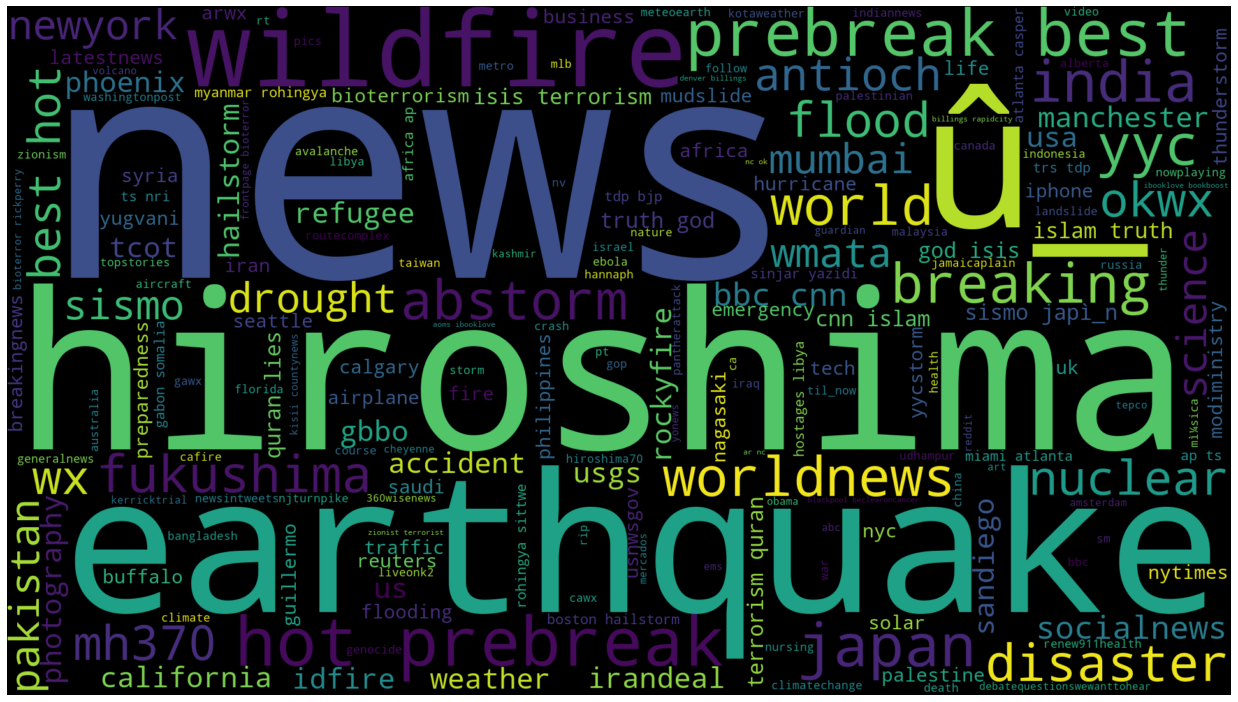

In [356]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 1920,height = 1080,background_color = "black").generate(true_hashtags)
fig = plt.figure(figsize=(17,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

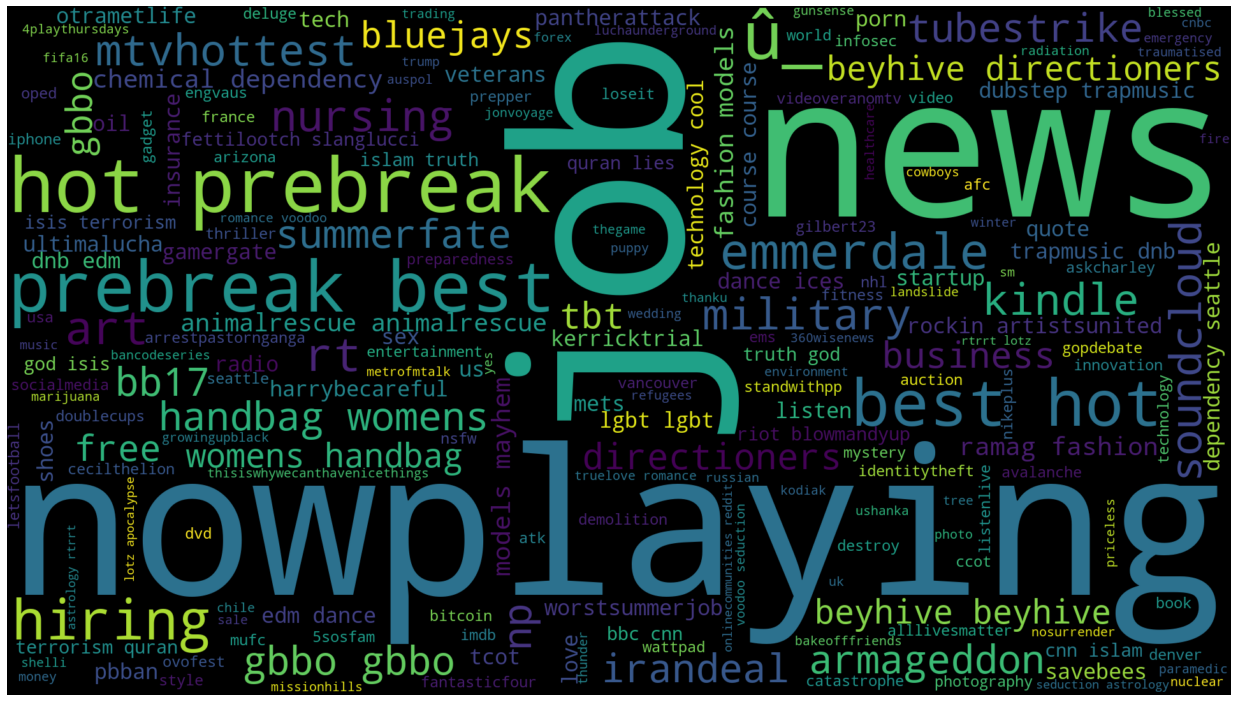

In [357]:
wordcloud = WordCloud(width = 1920,height = 1080,background_color = "black").generate(fake_hashtags)
fig = plt.figure(figsize=(17,17))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

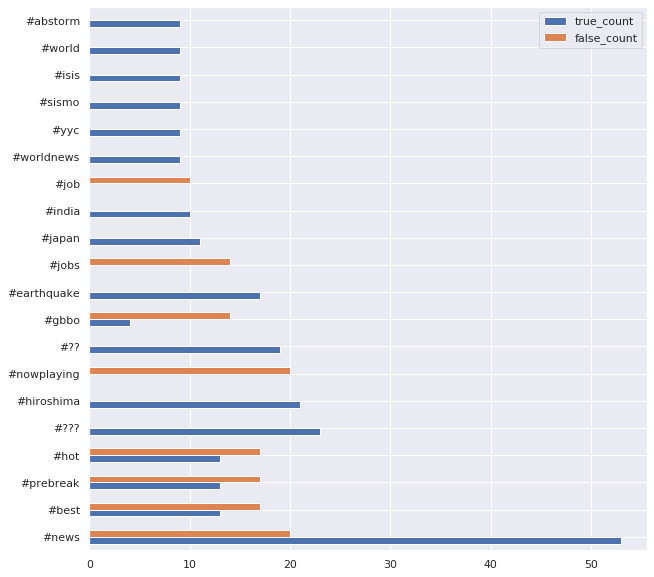

In [358]:
all_hashtags = pd.concat([top_true_hashtags,top_fake_hashtags],join="outer",axis=1)
all_hashtags.fillna(0,inplace=True)
all_hashtags["total"] = all_hashtags["true_count"] + all_hashtags["false_count"]
top_20_hashtags = all_hashtags.nlargest(20,"total")
ax = top_20_hashtags.loc[:, ['true_count', 'false_count']].plot(kind='barh', figsize=(10, 10))

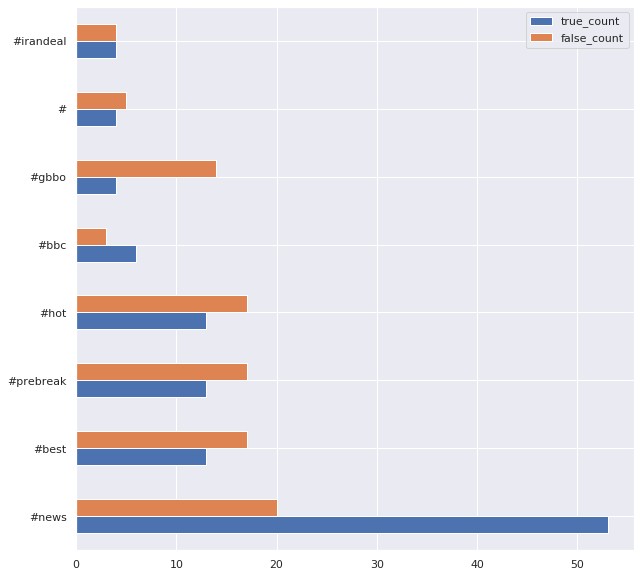

In [359]:
both_hashtags = pd.concat([top_true_hashtags,top_fake_hashtags],join="outer",axis=1)
both_hashtags.dropna(inplace=True)
ax = both_hashtags.loc[:, ['true_count', 'false_count']].plot(kind='barh', figsize=(10, 10))

## HASHTAGS MAS USADOS

In [360]:
#
tweets['hashtags'] = tweets['text'].str.findall(r'#.\S*?(?=\s|[:]|$)')
tweets_hashtags = tweets.explode('hashtags')
tweets_hashtags.drop(['id', 'keyword', 'text'], axis = 1, inplace = True)
tweets_hashtags['hashtags'] = tweets_hashtags['hashtags'].str.lower()
tweets_hashtags.sample(25)


location  target     hashtags
1714                       Waco TX       1          NaN
3489                           NaN       0          NaN
5567                       Seattle       0          NaN
6163   The American Wasteland (MV)       0          NaN
5086                           NaN       1    #disaster
6276                Wilmington, NC       0          NaN
6594                           NaN       0         #bbc
4136              Calgary, Alberta       1          NaN
5537                           NaN       1      #sejorg
2644                           NaN       1          NaN
5477                           NaN       1          NaN
2045              Atlanta Georgia        0  #slanglucci
1316                  Paradise, NV       0          NaN
1580             Colchester Essex        0          NaN
1408      The Low-Cal Calzone Zone       1          NaN
2983  Coasts of Maine & California       0          NaN
5701             Pennsylvania, USA       0          NaN
5925                           NaN       0          NaN
7062                       Chester       0        #care
6936                   Manila City       0          NaN
703                     Everywhere       0     #escorts
2244                           NaN       0          NaN
2868                   Orlando, FL       1        #weed
562                          Earth       0    #warcraft
4477               Rocky Mountains       1       #miami

In [361]:
hashtags_top = tweets_hashtags.groupby('hashtags').agg({'target':['count','mean']})
hashtags_top.sort_values(by=("target","count"),ascending = False,inplace = True)
hashtags_top[("target","mean")] = (hashtags_top[("target","mean")]*100).round()
hashtags_top = hashtags_top.head(50).reset_index()

hashtags_top.head(25)

hashtags target       
                   count   mean
0           #news     74   73.0
1            #hot     30   43.0
2           #best     30   43.0
3       #prebreak     30   43.0
4            #???     23  100.0
5     #nowplaying     23    9.0
6      #hiroshima     21  100.0
7             #??     20   95.0
8           #gbbo     18   22.0
9     #earthquake     17  100.0
10          #jobs     14    0.0
11          #isis     12   75.0
12     #terrorism     11   73.0
13         #japan     11  100.0
14           #job     11    0.0
15         #world     11   82.0
16         #sismo     10   90.0
17         #india     10  100.0
18       #abstorm      9  100.0
19            #rt      9   22.0
20       #nuclear      9   78.0
21           #bbc      9   67.0
22  #directioners      9   11.0
23     #worldnews      9  100.0
24           #yyc      9  100.0

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 137 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 137 missing from current font.



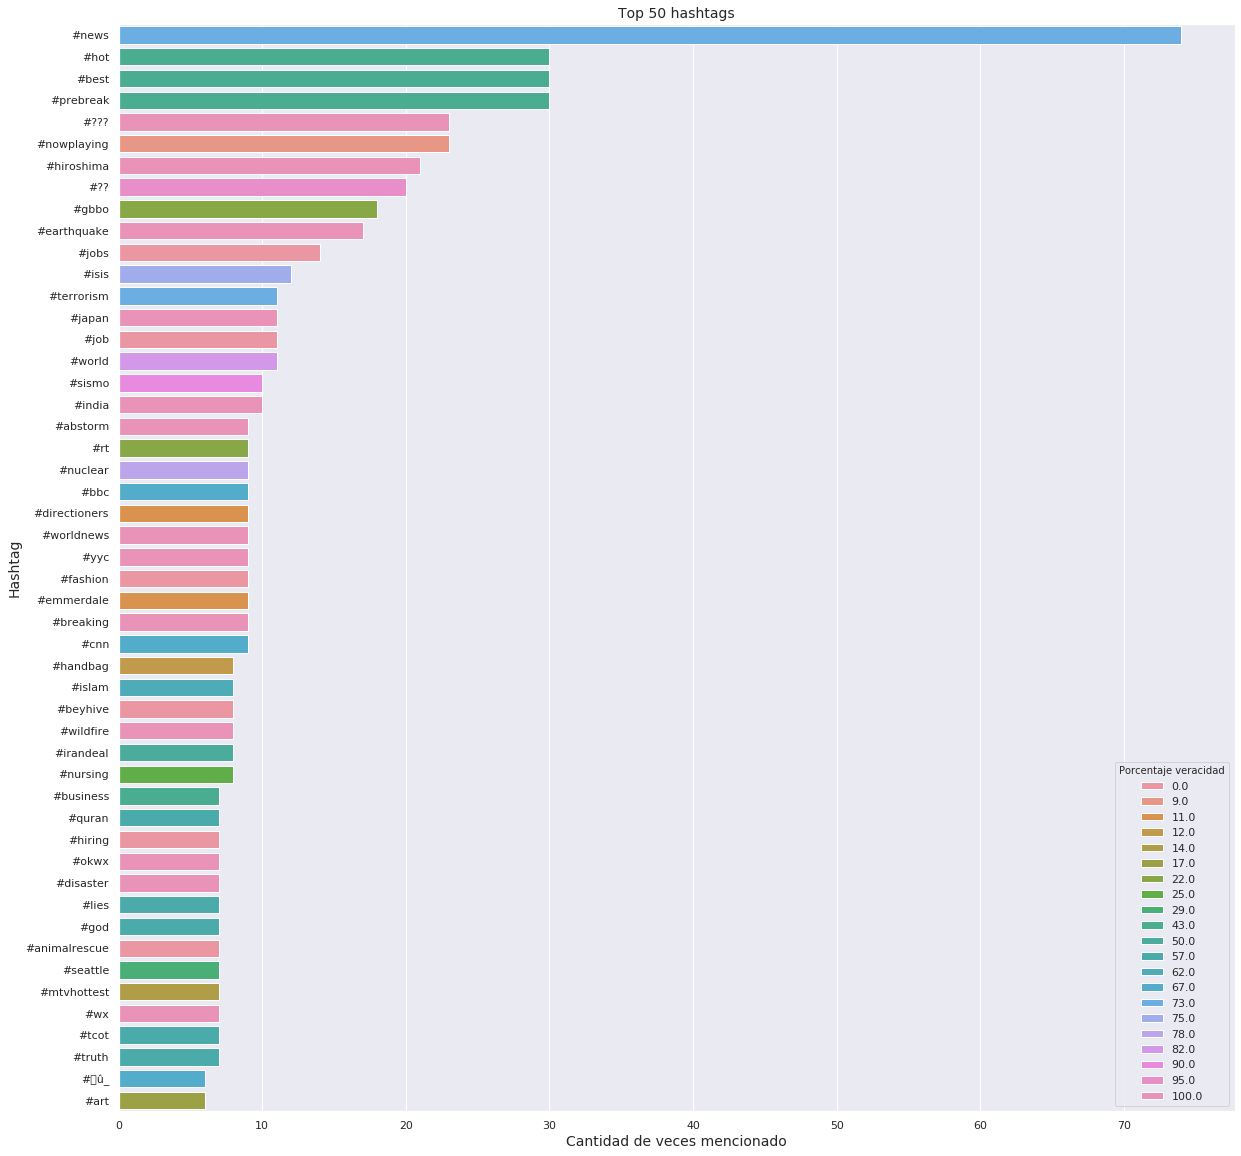

In [362]:
fig = plt.figure(figsize = (20, 20))
palette = sns.dark_palette("muted purple", input="xkcd")
grafico = sns.barplot(data = hashtags_top, x = ("target","count"), y = 'hashtags', hue = ('target','mean'), dodge = False)#, hue = ('target','mean'), palette = palette, dodge = False
grafico.set_title("Top 50 hashtags", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Porcentaje veracidad', loc='lower right')
plt.show(grafico)

## Trending topics de las ciudades mas "desastrosas"

In [363]:
tweets_hashtags.dropna(subset = ['location', 'hashtags'], inplace= True)
tweets_hashtags = tweets_hashtags[(tweets.target == 1)]
locations = tweets_hashtags.groupby('location').agg({'location':'count', 'hashtags': 'max'})
locations = locations.rename(columns = {'location': 'count'})
locations = locations.reset_index()
locations.sort_values(by= 'count', inplace= True, ascending = False)
locations = locations.head(50)
locations.head(5)

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



location  count     hashtags
355              USA     49   #worldnews
360    United States     14        #wxky
353               UK     14    #ukfloods
291  Rocky Mountains     13     #yazidis
372    Washington DC     13  #whitehouse

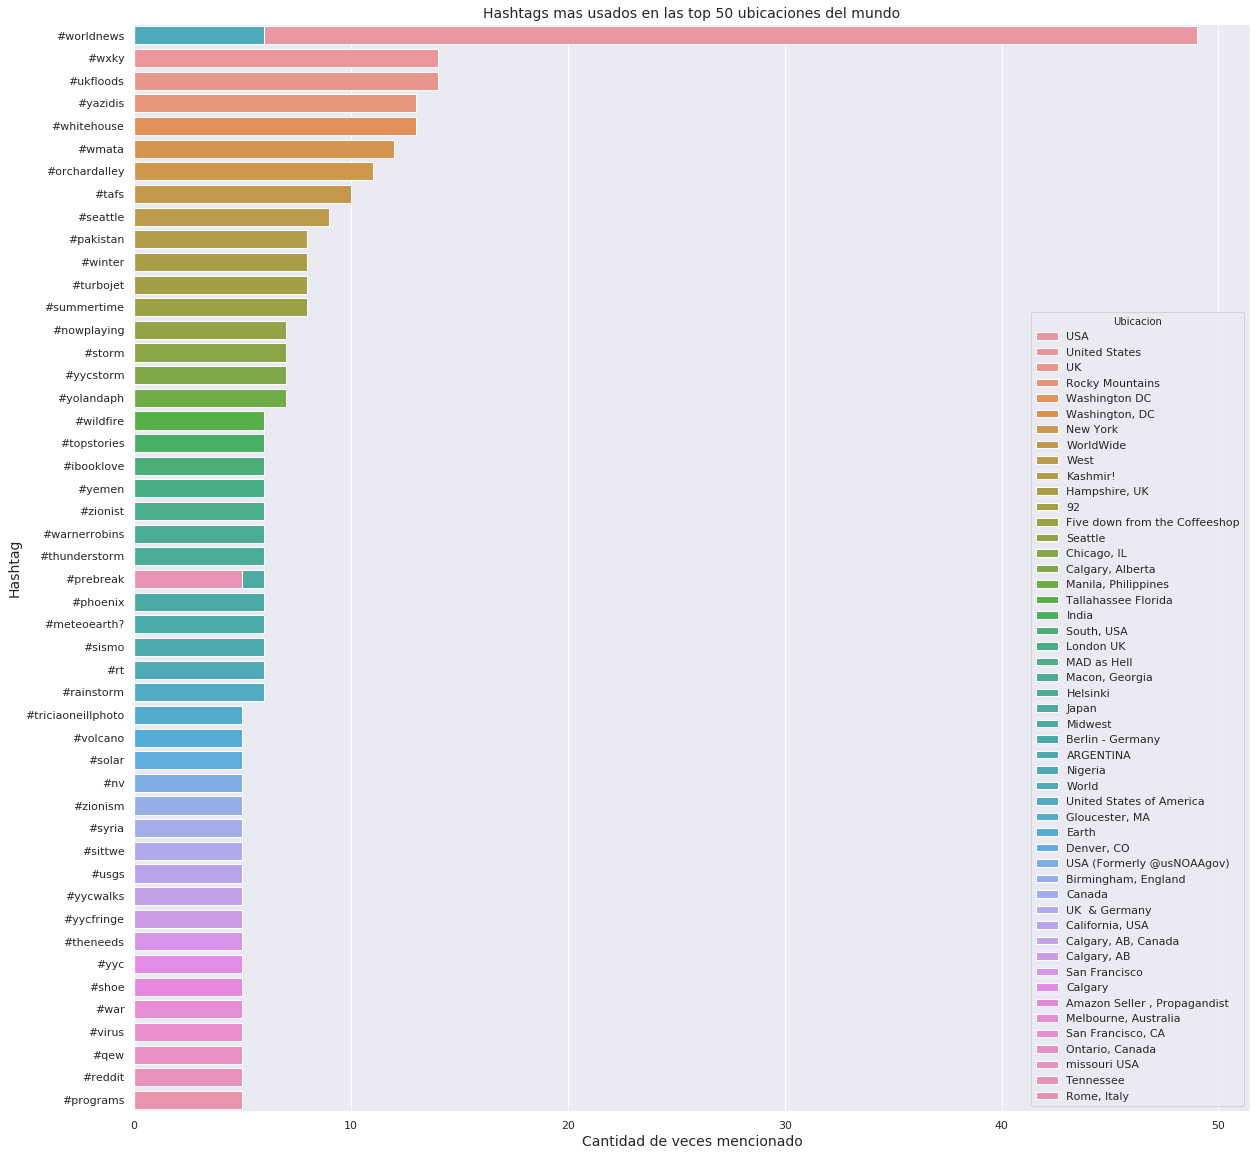

In [364]:
fig = plt.figure(figsize = (20, 20))
#palette = sns.dark_palette("muted purple", input="xkcd")
grafico = sns.barplot(data = locations, x = 'count', y = 'hashtags', hue = 'location', dodge = False)#, hue = ('target','mean'), palette = palette, dodge = False
grafico.set_title("Hashtags mas usados en las top 50 ubicaciones del mundo", fontsize = 14)
grafico.set_xlabel("Cantidad de veces mencionado", fontsize = 14)
grafico.set_ylabel("Hashtag", fontsize = 14)
plt.legend(title='Ubicacion', loc='lower right')
plt.show(grafico)

In [365]:
hashtags_by_location = tweets
hashtags_by_location['target_mean'] = hashtags_by_location.groupby('keyword')['target'].transform('mean')
hashtags_by_location['keyword_count'] = hashtags_by_location.groupby('keyword')['keyword'].transform('count')

hashtags_by_location.sort_values(by='target_mean', ascending=False, inplace = True)
hashtags_by_location = hashtags_by_location.head(200)
hashtags_by_location.head(20)

id     keyword                   location  \
2446   3512  derailment                        NaN   
2467   3535  derailment                        NaN   
2173   3116      debris                        NaN   
2172   3115      debris                        NaN   
2171   3114      debris         46.950109,7.439469   
2170   3112      debris                        NaN   
2169   3111      debris                   Nigeria    
2168   3109      debris                        NaN   
2167   3108      debris                        NaN   
2166   3107      debris  772 Temperance Permenence   
2165   3106      debris                        NaN   
2164   3105      debris                        NaN   
2163   3104      debris      Belbroughton, England   
7505  10735    wreckage                     Mumbai   
7506  10736    wreckage                      Tokyo   
7507  10737    wreckage                        NaN   
7508  10739    wreckage                     Sydney   
2447   3513  derailment          Chicago, IL 60607   
2476   3550  derailment                      India   
2474   3548  derailment               Chicago, IL    

                                                   text  target  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2171  How Missing JetÛªs Debris Could Have Floated ...       1   
2170  #?? #???? #??? #??? MH370: Aircraft debris fou...       1   
2169  Malaysia confirms plane debris washed up on Re...       1   
2168  #?? #?? #??? #??? MH370: Aircraft debris found...       1   
2167                 Confirmed the debris from MH370 ??       1   
2166  Discovered Plane Debris Is From Missing Malays...       1   
2165  #?? #?? #??? #??? MH370: Aircraft debris found...       1   
2164  Malaysia Airlines Flight 370 that Disappeared ...       1   
2163  #aerospace #exec Plane debris is from missing ...       1   
7505  Wreckage 'Conclusively Confirmed' as From MH37...       1   
7506  Wreckage Confirmed As Part of Missing Malaysia...       1   
7507  Wreckage 'Conclusively Confirmed' as From MH37...       1   
7508  MH370 victim's family furious the media was to...       1   
2447  Still and Box alarm for the train derailment a...       1   
2476  Helping Hand: In Mumbai 2 TTEs take charge of ...       1   
2474  Scene of the derailment.. CTA Green Line at 63...       1   

                      hashtags  target_mean  keyword_count  
2446           [#ModiMinistry]          1.0           31.0  
2467                        []          1.0           31.0  
2173                        []          1.0           37.0  
2172                        []          1.0           37.0  
2171                        []          1.0           37.0  
2170  [#??, #????, #???, #???]          1.0           37.0  
2169                        []          1.0           37.0  
2168    [#??, #??, #???, #???]          1.0           37.0  
2167                        []          1.0           37.0  
2166                        []          1.0           37.0  
2165    [#??, #??, #???, #???]          1.0           37.0  
2164                        []          1.0           37.0  
2163       [#aerospace, #exec]          1.0           37.0  
7505                        []          1.0           36.0  
7506                        []          1.0           36.0  
7507                        []          1.0           36.0  
7508                        []          1.0           36.0  
2447         [#ChicagoScanner]          1.0           31.0  
2476                        []          1.0           31.0  
2474                        []          1.0           31.0

In [366]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

geolocator = Nominatim(user_agent="aguslopezn")

geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
locations['location'] = locations['location'].apply(geocode)
locations

location  count  \
355        (United States, (39.7837304, -100.4458825))     49   
360        (United States, (39.7837304, -100.4458825))     14   
353         (United Kingdom, (54.7023545, -3.2765753))     14   
291  (Rocky Mountains, Teton County, Wyoming, Unite...     13   
372  (Washington, District of Columbia, 20500, Unit...     13   
374  (Washington, District of Columbia, 20500, Unit...     12   
241  (New York, United States of America, (40.71272...     11   
387  (Worldwide, Crescent Road, Crumpsall, Manchest...     10   
377  (Western, West Kenya, Kenya, (0.5090396, 34.57...      9   
182  (کشمیر, Baltistān District, گلگت بلتستان, پاکس...      8   
145  (Great Britain, Hampshire, Richmondshire, Nort...      8   
10   (Hauts-de-Seine, Île-de-France, France métropo...      8   
126                                               None      8   
308  (Seattle, King County, Washington, United Stat...      7   
85   (Chicago, Cook County, Illinois, United States...      7   
72   (Calgary, Alberta, Canada, (51.0534234, -114.0...      7   
214  (Manila, NCR, First District, Metro Manila, Ph...      7   
327  (Tallahassee, Leon County, Florida, United Sta...      6   
165           (भारत - India, (22.3511148, 78.6677428))      6   
320  (Sandusky County, Ohio, United States of Ameri...      6   
196  (London, Greater London, England, SW1A 2DX, Un...      6   
204                                               None      6   
209  (Macon, Bibb County, Georgia, United States of...      6   
149  (Helsinki, Helsingin seutukunta, Uusimaa, Mann...      6   
173                    (日本, (36.5748441, 139.2394179))      6   
222  (Midwest, Natrona County, Wyoming, United Stat...      6   
51     (Berlin, Deutschland, (52.5170365, 13.3888599))      6   
17             (Argentina, (-34.9964963, -64.9672817))      6   
248                  (Nigeria, (9.6000359, 7.9999721))      6   
384  (World, Victoria Street, Mitchelltown, Te Aro,...      6   
361        (United States, (39.7837304, -100.4458825))      6   
141  (Gloucester, Essex County, Massachusetts, 0193...      5   
113  (Earth, Lamb County, Texas, United States of A...      5   
99   (Denver, Denver County, Colorado, United State...      5   
356                                               None      5   
55   (Birmingham, West Midlands Combined Authority,...      5   
77                (Canada, (61.0666922, -107.9917071))      5   
354  (UK, Bilker Allee, Unterbilk, Stadtbezirk 3, D...      5   
75   (California, United States of America, (36.701...      5   
71   (Calgary, Alberta, Canada, (51.0534234, -114.0...      5   
70   (Calgary, Alberta, Canada, (51.0534234, -114.0...      5   
299  (San Francisco, San Francisco City and County,...      5   
69   (Calgary, Alberta, Canada, (51.0534234, -114.0...      5   
27                                                None      5   
220  (City of Melbourne, Victoria, Australia, (-37....      5   
302  (San Francisco, Avenue Joseph-Laflèche, Terras...      5   
264         (Ontario, Canada, (50.000678, -86.000977))      5   
406  (Missouri, United States of America, (38.76048...      5   
329  (Tennessee, United States of America, (35.7730...      5   
292  (Roma, Roma Capitale, Italia, (41.8933203, 12....      5   

               hashtags  
355          #worldnews  
360               #wxky  
353           #ukfloods  
291            #yazidis  
372         #whitehouse  
374              #wmata  
241       #orchardalley  
387               #tafs  
377            #seattle  
182           #pakistan  
145             #winter  
10            #turbojet  
126         #summertime  
308         #nowplaying  
85               #storm  
72            #yycstorm  
214          #yolandaph  
327           #wildfire  
165         #topstories  
320          #ibooklove  
196              #yemen  
204            #zionist  
209       #warnerrobins  
149       #thunderstorm  
173           #prebreak  
222            #phoenix  
51         #meteoearth?  
17

In [367]:
from shapely.geometry import Point

locations['point'] = locations['location'].apply(lambda loc: (loc.longitude, loc.latitude) if loc else None)
locations = locations.replace(to_replace='None', value=np.nan).dropna()
locations['point'] = locations['point'].apply(Point)

locations

location  count  \
355        (United States, (39.7837304, -100.4458825))     49   
360        (United States, (39.7837304, -100.4458825))     14   
353         (United Kingdom, (54.7023545, -3.2765753))     14   
291  (Rocky Mountains, Teton County, Wyoming, Unite...     13   
372  (Washington, District of Columbia, 20500, Unit...     13   
374  (Washington, District of Columbia, 20500, Unit...     12   
241  (New York, United States of America, (40.71272...     11   
387  (Worldwide, Crescent Road, Crumpsall, Manchest...     10   
377  (Western, West Kenya, Kenya, (0.5090396, 34.57...      9   
182  (کشمیر, Baltistān District, گلگت بلتستان, پاکس...      8   
145  (Great Britain, Hampshire, Richmondshire, Nort...      8   
10   (Hauts-de-Seine, Île-de-France, France métropo...      8   
308  (Seattle, King County, Washington, United Stat...      7   
85   (Chicago, Cook County, Illinois, United States...      7   
72   (Calgary, Alberta, Canada, (51.0534234, -114.0...      7   
214  (Manila, NCR, First District, Metro Manila, Ph...      7   
327  (Tallahassee, Leon County, Florida, United Sta...      6   
165           (भारत - India, (22.3511148, 78.6677428))      6   
320  (Sandusky County, Ohio, United States of Ameri...      6   
196  (London, Greater London, England, SW1A 2DX, Un...      6   
209  (Macon, Bibb County, Georgia, United States of...      6   
149  (Helsinki, Helsingin seutukunta, Uusimaa, Mann...      6   
173                    (日本, (36.5748441, 139.2394179))      6   
222  (Midwest, Natrona County, Wyoming, United Stat...      6   
51     (Berlin, Deutschland, (52.5170365, 13.3888599))      6   
17             (Argentina, (-34.9964963, -64.9672817))      6   
248                  (Nigeria, (9.6000359, 7.9999721))      6   
384  (World, Victoria Street, Mitchelltown, Te Aro,...      6   
361        (United States, (39.7837304, -100.4458825))      6   
141  (Gloucester, Essex County, Massachusetts, 0193...      5   
113  (Earth, Lamb County, Texas, United States of A...      5   
99   (Denver, Denver County, Colorado, United State...      5   
55   (Birmingham, West Midlands Combined Authority,...      5   
77                (Canada, (61.0666922, -107.9917071))      5   
354  (UK, Bilker Allee, Unterbilk, Stadtbezirk 3, D...      5   
75   (California, United States of America, (36.701...      5   
71   (Calgary, Alberta, Canada, (51.0534234, -114.0...      5   
70   (Calgary, Alberta, Canada, (51.0534234, -114.0...      5   
299  (San Francisco, San Francisco City and County,...      5   
69   (Calgary, Alberta, Canada, (51.0534234, -114.0...      5   
220  (City of Melbourne, Victoria, Australia, (-37....      5   
302  (San Francisco, Avenue Joseph-Laflèche, Terras...      5   
264         (Ontario, Canada, (50.000678, -86.000977))      5   
406  (Missouri, United States of America, (38.76048...      5   
329  (Tennessee, United States of America, (35.7730...      5   
292  (Roma, Roma Capitale, Italia, (41.8933203, 12....      5   

               hashtags                                        point  
355          #worldnews              POINT (-100.4458825 39.7837304)  
360               #wxky              POINT (-100.4458825 39.7837304)  
353           #ukfloods                POINT (-3.2765753 54.7023545)  
291            #yazidis              POINT (-110.9175065 43.3578532)  
372         #whitehouse        POINT (-77.03657080000001 38.8949855)  
374              #wmata        POINT (-77.03657080000001 38.8949855)  
241       #orchardalley        POINT (-74.00601519999999 40.7127281)  
387               #tafs                POINT (-2.2434612 53.5120412)  
377            #seattle                 POINT (34.5731341 0.5090396)  
182           #pakistan         POINT (75.39310005390217 34.9271029)  
145             #winter       POINT (-1.243409360344216 51.04483545)  
10            #turbojet  POINT (2.198641221906077 48.84018589999999)  
308         #nowplaying              POINT (-122.3300624 47.6038321

[]

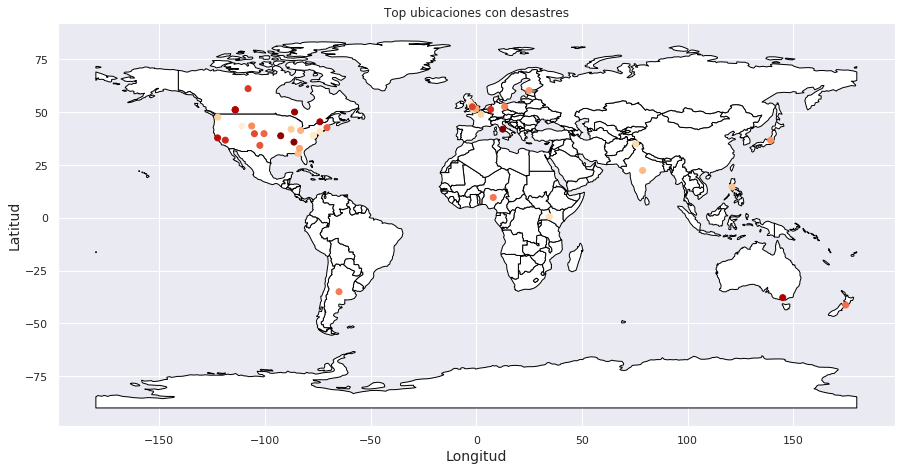

In [368]:
import geopandas as gpd

locations['point'].apply(Point)
mapa = gpd.GeoDataFrame(locations, geometry='point')

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white',edgecolor='black', figsize = (15, 20))

grafico = mapa.plot(ax=ax, cmap='OrRd', legend=True)
grafico.axes.set_title('Top ubicaciones con desastres')
grafico.set_xlabel("Longitud", fontsize = 14)
grafico.set_ylabel("Latitud", fontsize = 14)
grafico.plot()

# TEXT

TOP PALABRAS EN LOS TWEETS

In [369]:
def by_word_count(dataframe):
    word_list = dataframe["text"].str.split()
    all_stopwords_gensim = STOPWORDS.union(set(string.punctuation))
    filtered = [word.lower() for word in np.concatenate(word_list.values) if not word in all_stopwords_gensim]
    words = pd.DataFrame(filtered,columns = ["word"])
    words["amount"] = 1
    by_count = words.groupby(["word"]).agg({"amount":["count"]})
    level0 = by_count.columns.get_level_values(0)
    level1 = by_count.columns.get_level_values(1)
    by_count.columns = level0 + "_" + level1
    by_count.sort_values(by="amount_count",ascending = False,inplace = True)
    return by_count.head(10)

In [370]:
true_by_word = tweets["target"] == 1
true_by_word = by_word_count(tweets[true_by_word])

false_by_word = tweets["target"] == 0
false_by_word = by_word_count(tweets[false_by_word])

[]

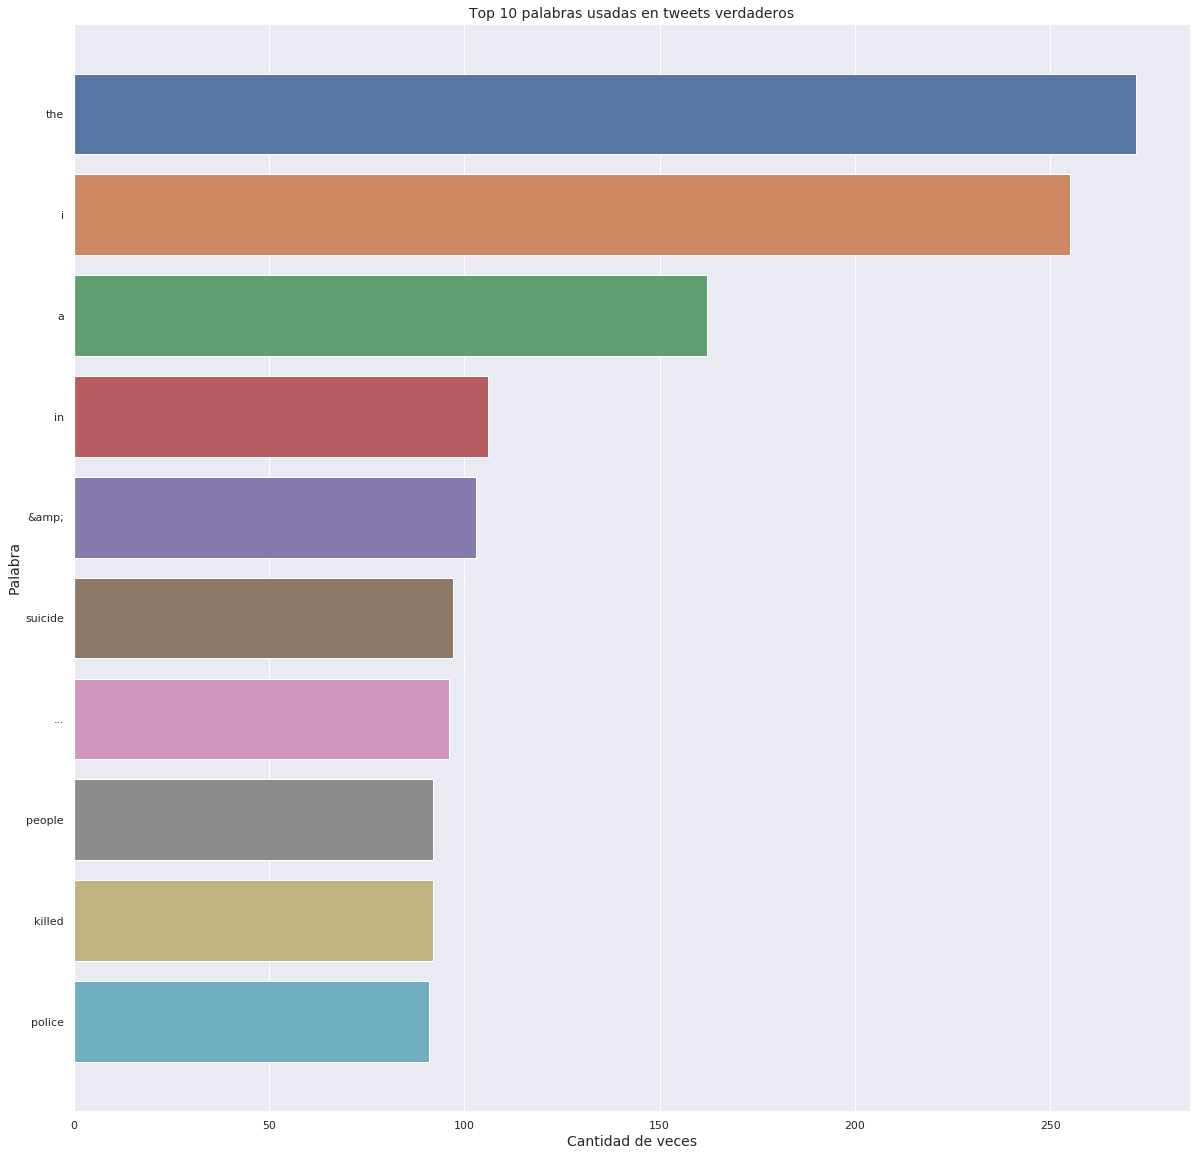

In [371]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = true_by_word,x = "amount_count",y=true_by_word.index)
grafico.set_title("Top 10 palabras usadas en tweets verdaderos",fontsize = 14)
grafico.set_xlabel("Cantidad de veces",fontsize = 14)
grafico.set_ylabel("Palabra",fontsize = 14)
grafico.plot()

[]

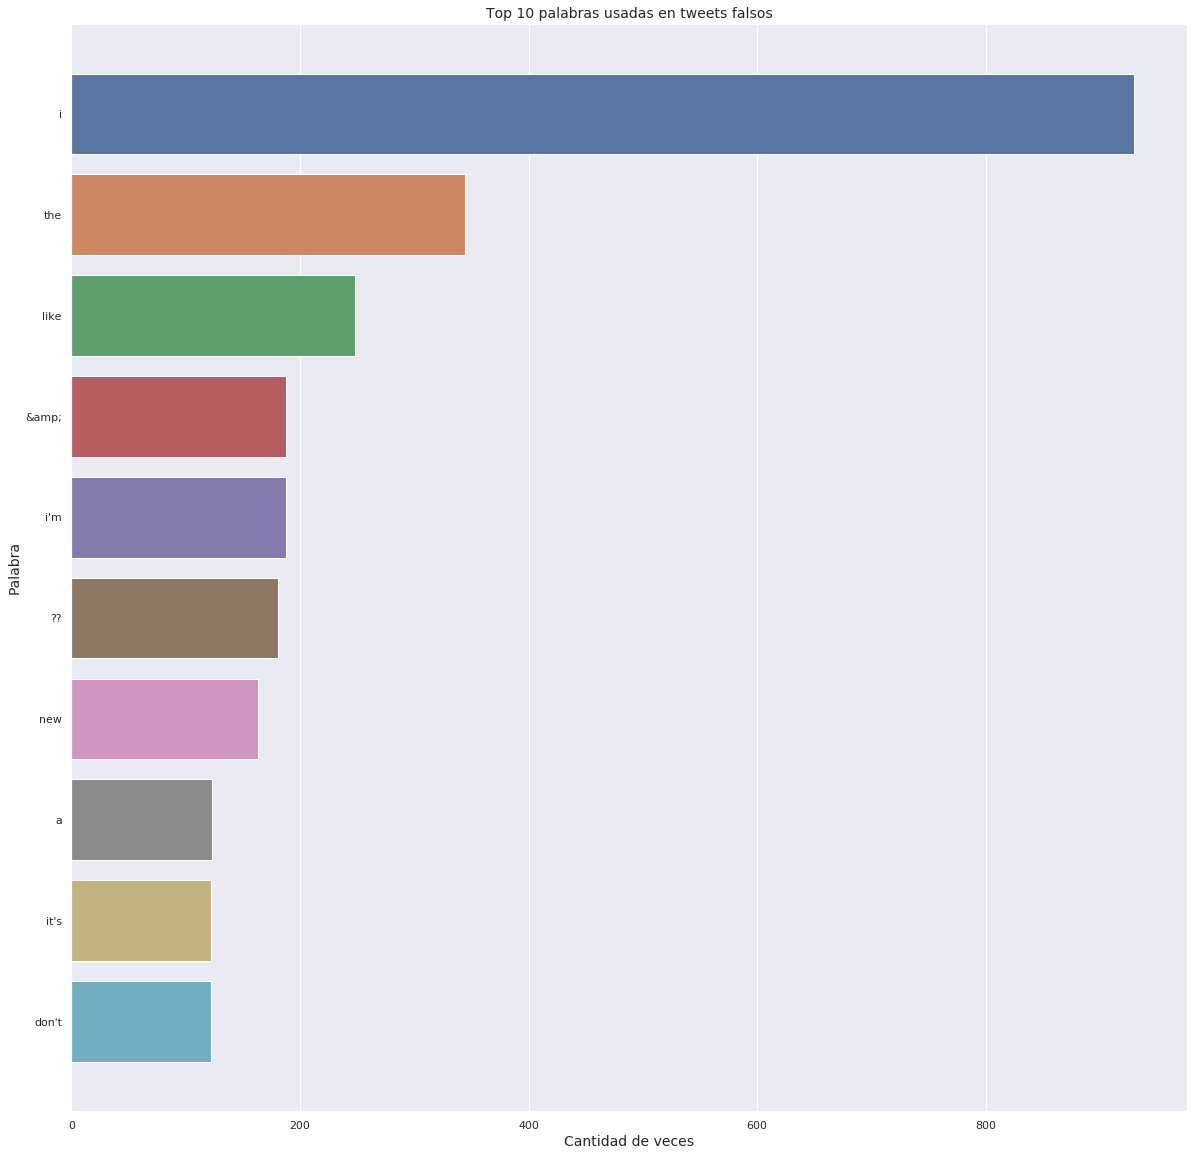

In [372]:
fig = plt.figure(figsize=(20,20))
grafico = sns.barplot(data = false_by_word,x = "amount_count",y=false_by_word.index)
grafico.set_title("Top 10 palabras usadas en tweets falsos",fontsize = 14)
grafico.set_xlabel("Cantidad de veces",fontsize = 14)
grafico.set_ylabel("Palabra",fontsize = 14)
grafico.plot()

## Análisis por longitud de tweet.

In [373]:
tweets_length = tweets[['text','target']]

tweets_length.count()

text      7434
target    7434
dtype: int64

In [374]:
tweets_length['text'].hasnans

False

In [375]:
tweets_length['length'] = tweets_length['text'].str.len()
tweets_length.head()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  target  length
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101

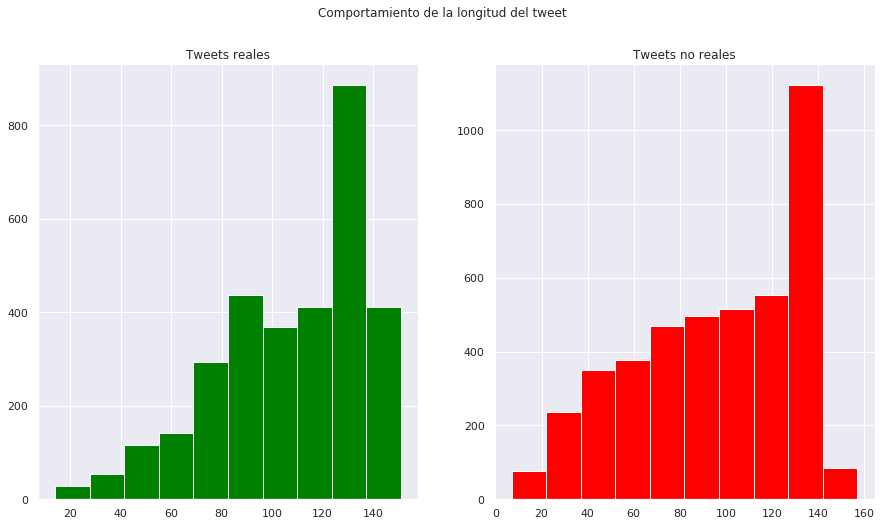

In [376]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
tweet_len = tweets_length[tweets_length['target'] == 1]['length']
ax1.hist(tweet_len,color='green')
ax1.set_title('Tweets reales')
tweet_len = tweets_length[tweets_length['target'] == 0]['length']
ax2.hist(tweet_len,color='red')
ax2.set_title('Tweets no reales')
fig.suptitle('Comportamiento de la longitud del tweet')
plt.show()

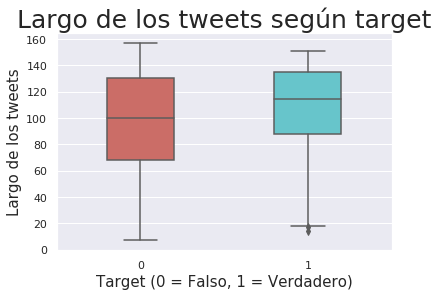

In [377]:
g = sns.boxplot(x = 'target', y = 'length', data = tweets_length, palette = 'hls', width = 0.4)
g.set_title("Largo de los tweets según target", fontsize = 25)
g.set_xlabel("Target (0 = Falso, 1 = Verdadero)", fontsize = 15)
g.set_ylabel("Largo de los tweets", fontsize = 15)
sns.set(rc = {'figure.figsize' : (15,10)})

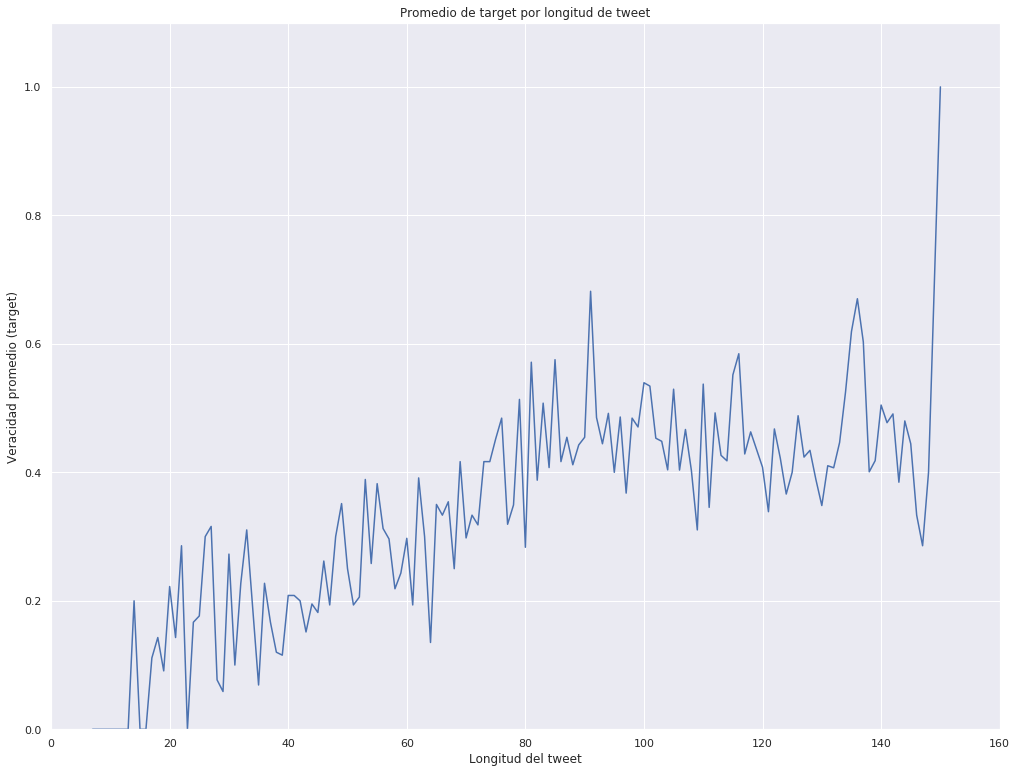

In [378]:
#ESTE ES CANDIDATO A VOLAR DE ACA, no sirve ---> Reemplazar por el scatter de Agus
grouped = tweets_length.groupby('length')['target'].agg(['mean','count'])

grouped[(grouped['count'] >= 2)]['mean'].plot(kind = "line",figsize = (17,13))
plt.title('Promedio de target por longitud de tweet')
plt.xlabel('Longitud del tweet')
plt.ylabel('Veracidad promedio (target)')
plt.xlim(0,160)
plt.ylim(0,1.1)
plt.show()

In [379]:
tweets_length['avg_word_length'] = tweets_length['text'].str.split().apply(lambda x: [len(y) for y in x]).transform(lambda x: np.mean(x))
tweets_length.head()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  target  length  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101   

      avg_word_length  
2446         8.181818  
2467         7.916667  
2173         5.866667  
2172         5.866667  
2171         5.800000

In [380]:
fig = px.histogram(tweets_length, x="avg_word_length", color="target", marginal="box", width = 1200, height = 550,
                             nbins = 300, title = 'Distribución de largo promedio de palabras por tweet individual')
fig.show()

In [381]:
tweets_length['amount_of_words'] = tweets_length['text'].str.split().transform(lambda x: len(x))
tweets_length.head()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  target  length  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101   

      avg_word_length  amount_of_words  
2446         8.181818               11  
2467         7.916667               12  
2173         5.866667               15  
2172         5.866667               15  
2171         5.800000               15

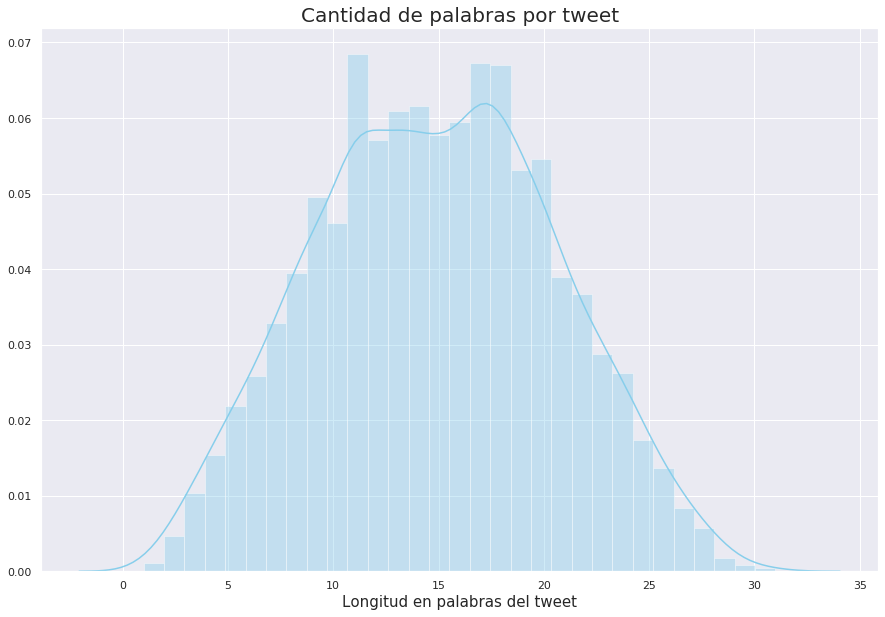

In [382]:
g = sns.distplot(tweets_length['amount_of_words'], bins = 31, color = 'SkyBlue')
g.set_title('Cantidad de palabras por tweet', fontsize = 20)
g.set_xlabel('Longitud en palabras del tweet', fontsize = 15)
plt.show()

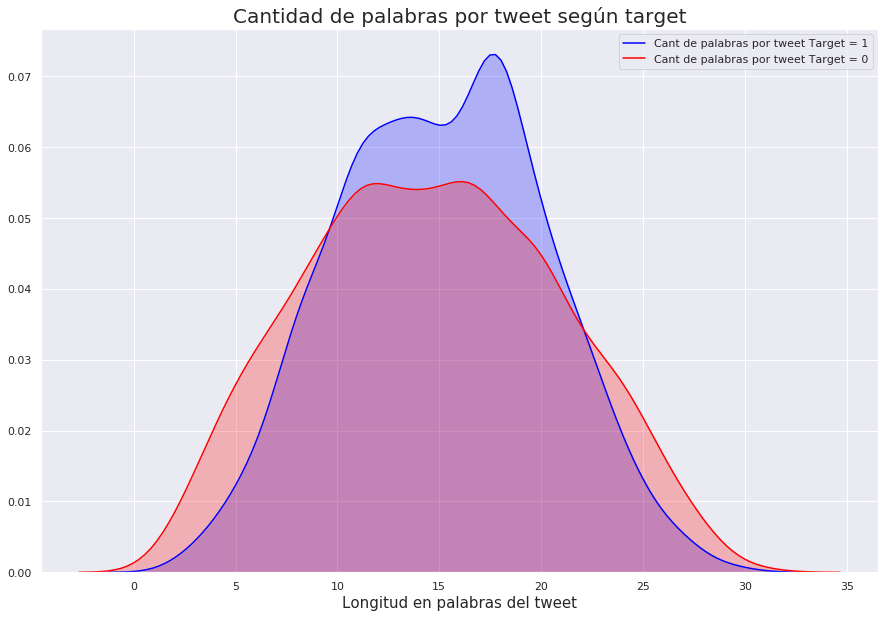

In [383]:
g = sns.kdeplot(tweets_length[tweets_length['target'] == 1]['amount_of_words'], color="blue", label='Cant de palabras por tweet Target = 1', shade=True)
g = sns.kdeplot(tweets_length[tweets_length['target'] == 0]['amount_of_words'], color="red", label='Cant de palabras por tweet Target = 0', shade=True)



#g = sns.distplot(tweets_length['amount_of_words'], bins = 31, color = 'black')
g.set_title('Cantidad de palabras por tweet según target', fontsize = 20)
g.set_xlabel('Longitud en palabras del tweet', fontsize = 15)
plt.show()

In [384]:
#Cantidad de palabras únicas (aka sin repetir) en el tweet
#unique_words_by_tweet = tweets_length['text'].apply(lambda x: x.split()).apply(lambda x: pd.Series(x).unique()).map(lambda x: len(x))
unique_words_by_tweet = tweets_length['text'].transform(lambda x: x.split()).transform(lambda x: pd.Series(x).unique()).transform(lambda x: len(x))
tweets_length['amount_of_unique_words'] = unique_words_by_tweet
tweets_length


/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  target  length  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101   
...                                                 ...     ...     ...   
7604  #WorldNews Fallen powerlines on G:link tram: U...       1     136   
7605  on the flip side I'm at Walmart and there is a...       1     114   
7606  Suicide bomber kills 15 in Saudi security site...       1     121   
7608  Two giant cranes holding a bridge collapse int...       1      83   
7612  The Latest: More Homes Razed by Northern Calif...       1      94   

      avg_word_length  amount_of_words  amount_of_unique_words  
2446         8.181818               11                      11  
2467         7.916667               12                      12  
2173         5.866667               15                      15  
2172         5.866667               15                      15  
2171         5.800000               15                      15  
...               ...              ...                     ...  
7604         6.210526               19                      19  
7605         3.423077               26                      25  
7606         5.100000               20                      18  
7608         6.636364               11                      11  
7612         6.307692               13                      13  

[7434 rows x 6 columns]

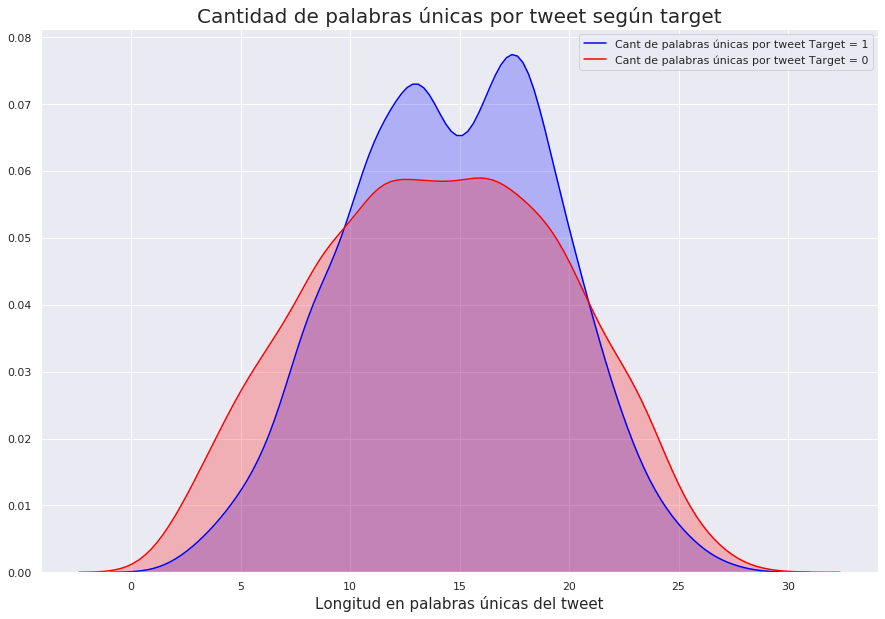

In [385]:
#Hipotesis: los de target 1 no repiten tantas palabras (?).
#Resultado: son casi lo mismo pero weno podemos dejarlo.
g = sns.kdeplot(tweets_length[tweets_length['target'] == 1]['amount_of_unique_words'], color="blue", label='Cant de palabras únicas por tweet Target = 1', shade=True)
g = sns.kdeplot(tweets_length[tweets_length['target'] == 0]['amount_of_unique_words'], color="red", label='Cant de palabras únicas por tweet Target = 0', shade=True)


#g = sns.distplot(tweets_length['amount_of_words'], bins = 31, color = 'black')
g.set_title('Cantidad de palabras únicas por tweet según target', fontsize = 20)
g.set_xlabel('Longitud en palabras únicas del tweet', fontsize = 15)
plt.show()

In [386]:
tweets_length['avg_length'] = tweets_length.groupby('target')['length'].transform('mean')
tweets_length.head()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



text  target  length  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101   

      avg_word_length  amount_of_words  amount_of_unique_words  avg_length  
2446         8.181818               11                      11  107.968889  
2467         7.916667               12                      12  107.968889  
2173         5.866667               15                      15  107.968889  
2172         5.866667               15                      15  107.968889  
2171         5.800000               15                      15  107.968889

In [387]:
tweets_length['is_above_avg_length'] = tweets_length['length'] > tweets_length['avg_length']
tweets_length.head()

text  target  length  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101   

      avg_word_length  amount_of_words  amount_of_unique_words  avg_length  \
2446         8.181818               11                      11  107.968889   
2467         7.916667               12                      12  107.968889   
2173         5.866667               15                      15  107.968889   
2172         5.866667               15                      15  107.968889   
2171         5.800000               15                      15  107.968889   

      is_above_avg_length  
2446                False  
2467                False  
2173                False  
2172                False  
2171                False

In [388]:
groupedby_is_above_avg_length = tweets_length.groupby('is_above_avg_length').agg({'target':['mean','count']})
groupedby_is_above_avg_length

target      
                         mean count
is_above_avg_length                
False                0.414736  3366
True                 0.431170  4068

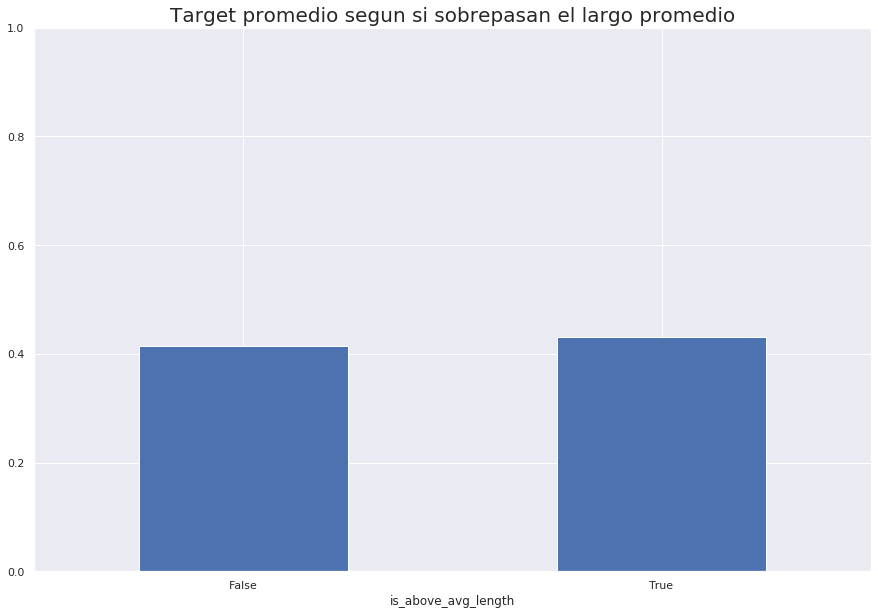

In [389]:
groupedby_is_above_avg_length[('target','mean')].plot(kind = 'bar', figsize = (15,10), rot = 0)
plt.title('Target promedio segun si sobrepasan el largo promedio', fontsize = 20)
plt.ylim(0,1)
plt.show()

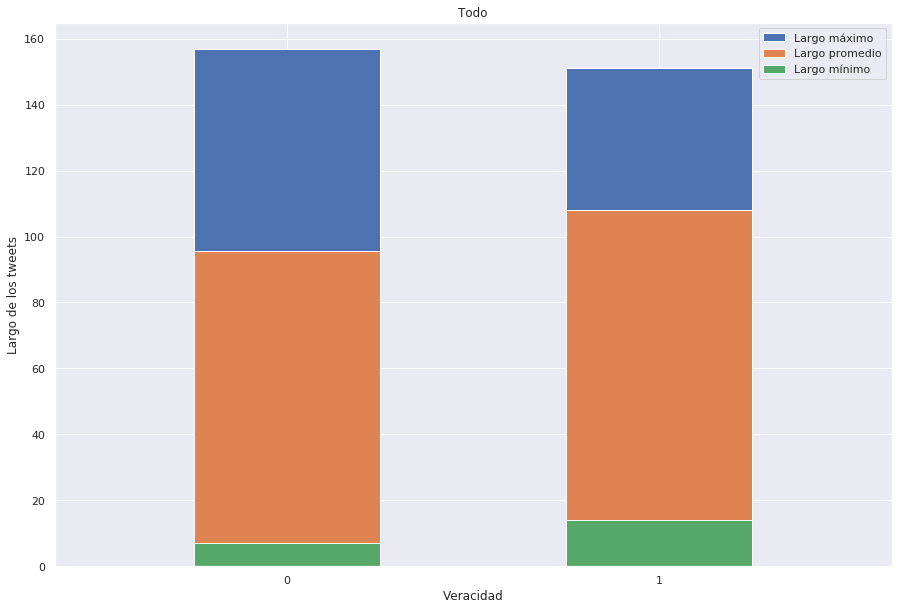

In [390]:
#grafico de promedio de longitud por target
visualizacion = tweets_length.groupby('target').agg({'length':['mean','max','min']})

c = visualizacion.columns.get_level_values(0)
v = visualizacion.columns.get_level_values(1)
visualizacion.columns = c + '_' + v
visualizacion.reset_index()


fig, ax = plt.subplots(figsize = (15,10))
ax.bar(visualizacion.index, visualizacion['length_max'],0.5, label='largo_max')
ax.bar(visualizacion.index, visualizacion['length_mean'],0.5, label='largo_mean')

ax.bar(visualizacion.index, visualizacion['length_min'],0.5, label='largo_min')

plt.margins(x=0.25)
plt.xticks([0,1])
ax.set_xlabel('Veracidad')
ax.set_ylabel('Largo de los tweets')
ax.set_title('Todo')
ax.legend(['Largo máximo','Largo promedio', 'Largo mínimo'], loc = 'upper right');
plt.show()

In [391]:
# generamos una columna para agregar y procesar mediante una tabla pivot


tweets_length['is_a_tweet'] = 1
for_heatmap = tweets_length.pivot_table(index = 'length', columns = 'target', values = 'is_a_tweet', aggfunc = 'sum')
for_heatmap.head()

target    0   1
length         
7       3.0 NaN
8       4.0 NaN
9       2.0 NaN
10      2.0 NaN
11      4.0 NaN

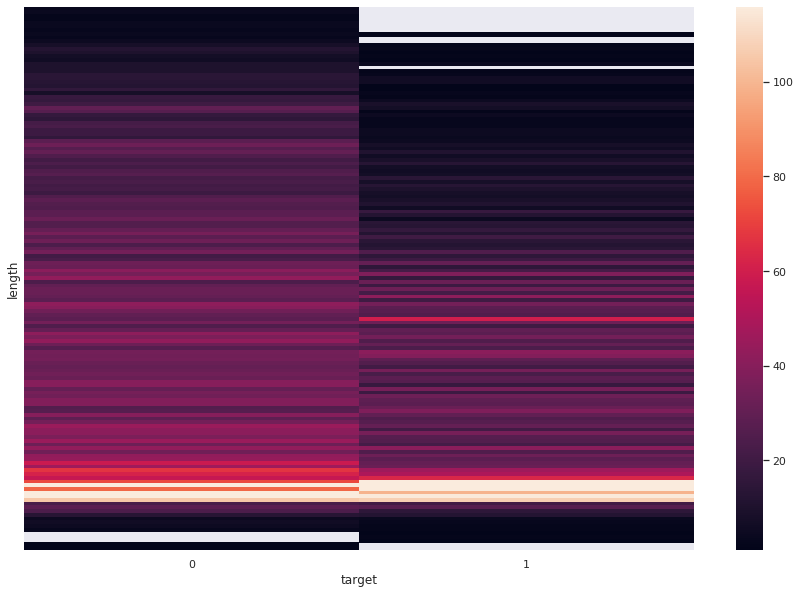

In [392]:
#Candidato a volar
g = sns.heatmap(for_heatmap, robust = True, yticklabels = False)#, cmap="YlGnBu")#, square = True)#, linewidths=1)

In [393]:
fig = px.density_heatmap(tweets_length, x='target', y="length")
fig.show()

In [394]:
tweets_to_corr = tweets_length[['length','target']]
tweets_to_corr.corr(method = 'pearson')

length    target
length  1.000000  0.181575
target  0.181575  1.000000

In [395]:
tweets_length

text  target  length  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1     100   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1     106   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1     102   
2171  How Missing JetÛªs Debris Could Have Floated ...       1     101   
...                                                 ...     ...     ...   
7604  #WorldNews Fallen powerlines on G:link tram: U...       1     136   
7605  on the flip side I'm at Walmart and there is a...       1     114   
7606  Suicide bomber kills 15 in Saudi security site...       1     121   
7608  Two giant cranes holding a bridge collapse int...       1      83   
7612  The Latest: More Homes Razed by Northern Calif...       1      94   

      avg_word_length  amount_of_words  amount_of_unique_words  avg_length  \
2446         8.181818               11                      11  107.968889   
2467         7.916667               12                      12  107.968889   
2173         5.866667               15                      15  107.968889   
2172         5.866667               15                      15  107.968889   
2171         5.800000               15                      15  107.968889   
...               ...              ...                     ...         ...   
7604         6.210526               19                      19  107.968889   
7605         3.423077               26                      25  107.968889   
7606         5.100000               20                      18  107.968889   
7608         6.636364               11                      11  107.968889   
7612         6.307692               13                      13  107.968889   

      is_above_avg_length  is_a_tweet  
2446                False           1  
2467                False           1  
2173                False           1  
2172                False           1  
2171                False           1  
...                   ...         ...  
7604                 True           1  
7605                 True           1  
7606                 True           1  
7608                False           1  
7612                False           1  

[7434 rows x 9 columns]

In [396]:

tweets_to_corr = tweets_length[['length','target','is_above_avg_length','avg_word_length','amount_of_words','amount_of_unique_words']]
#tweets_to_corr['mean'] = tweets_length['length'].mean()
tweets_to_corr['avg_target_by_length'] = tweets_length.groupby('length')['target'].transform('mean')
tweets_to_corr.head(20)
tweets_to_corr.corr(method = 'spearman')

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



length    target  is_above_avg_length  \
length                  1.000000  0.163143             0.853200   
target                  0.163143  1.000000             0.016555   
is_above_avg_length     0.853200  0.016555             1.000000   
avg_word_length         0.059593  0.222487             0.016442   
amount_of_words         0.831753  0.042861             0.750694   
amount_of_unique_words  0.836180  0.050607             0.752541   
avg_target_by_length    0.559572  0.255651             0.409631   

                        avg_word_length  amount_of_words  \
length                         0.059593         0.831753   
target                         0.222487         0.042861   
is_above_avg_length            0.016442         0.750694   
avg_word_length                1.000000        -0.427486   
amount_of_words               -0.427486         1.000000   
amount_of_unique_words        -0.398531         0.986645   
avg_target_by_length           0.135761         0.466707   

                        amount_of_unique_words  avg_target_by_length  
length                                0.836180              0.559572  
target                                0.050607              0.255651  
is_above_avg_length                   0.752541              0.409631  
avg_word_length                      -0.398531              0.135761  
amount_of_words                       0.986645              0.466707  
amount_of_unique_words                1.000000              0.469499  
avg_target_by_length                  0.469499              1.000000

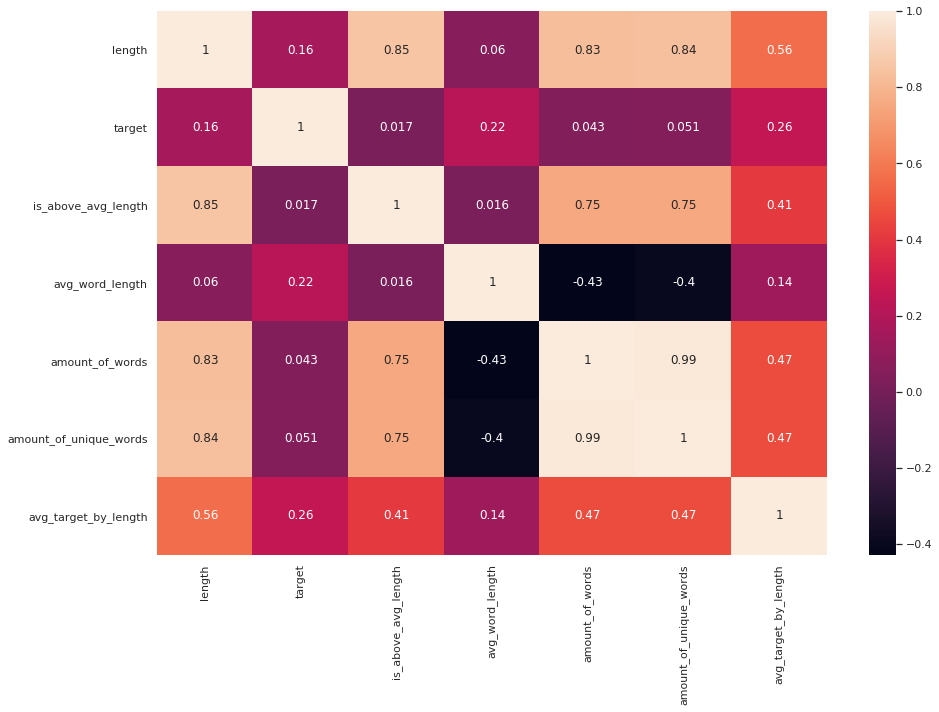

In [397]:
#Candidato a volar
sns.heatmap(tweets_to_corr.corr(method = 'spearman'), annot = True)
plt.show()

## Bueno hasta acá todo lo relacionado a longitud

## Ahora vamos con relacion links en tweet vs veracidad
Si contienen links ver su target

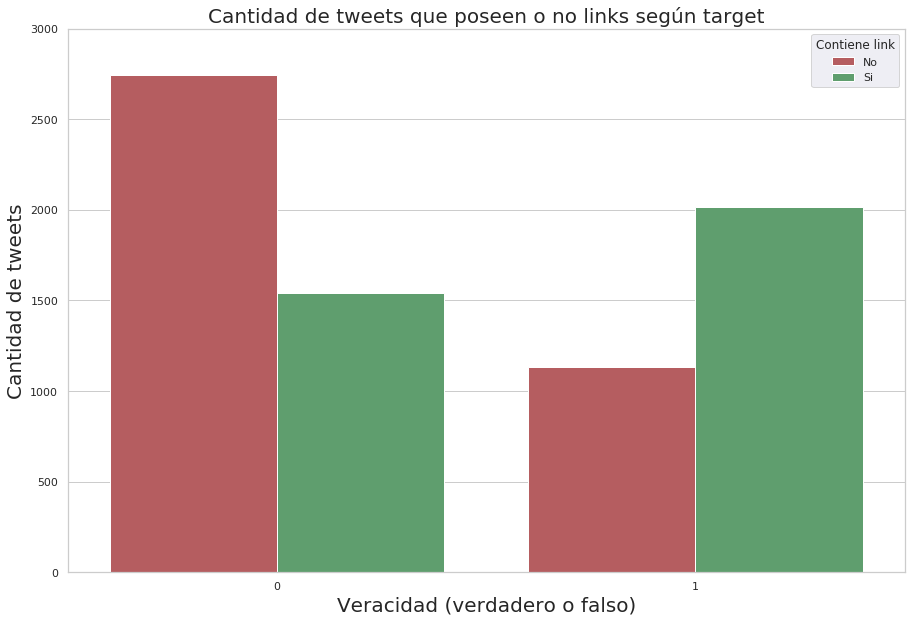

In [398]:
tweets_length['contains_link'] = tweets_length['text'].str.contains('http://' or 'https://')

sns.set(style="whitegrid")
g = sns.countplot(x = 'target', hue = "contains_link", data = tweets_length, palette = [sns.color_palette()[3], sns.color_palette()[2]])


g.set_title('Cantidad de tweets que poseen o no links según target', fontsize = 20)
g.set_xlabel('Veracidad (verdadero o falso)', fontsize = 20)
g.set_ylabel('Cantidad de tweets', fontsize = 20)
plt.ylim(0,3000)
sns.set(rc = {'figure.figsize' : (15,10)})

g.legend(['No','Si'], loc = 'upper right', title = 'Contiene link');

plt.show()

In [399]:
#Pispeo los valores
tweets_length[tweets_length['contains_link']].groupby('target').agg({'length':['count', 'mean']})

length            
        count        mean
target                   
0        1539  109.897986
1        2017  111.668319

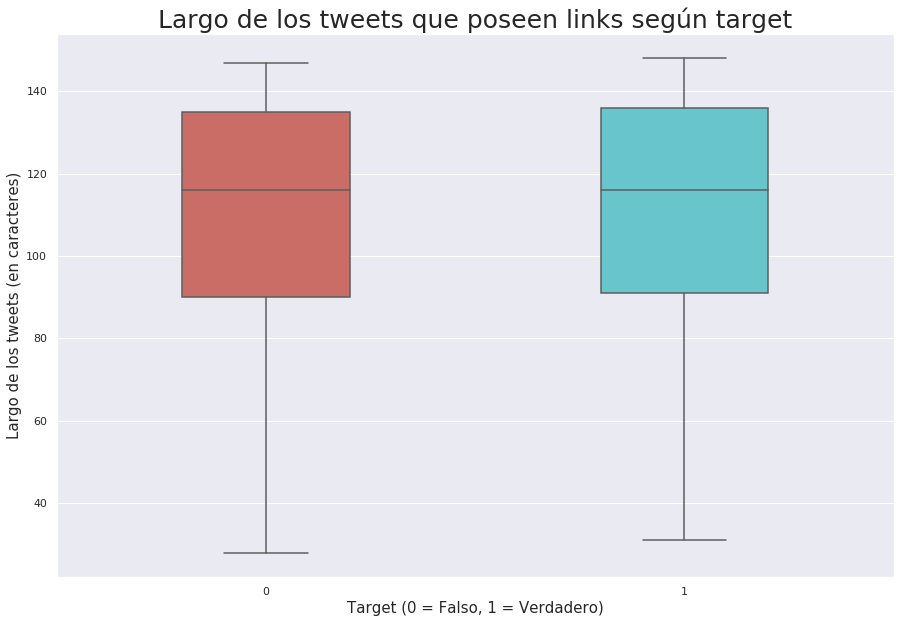

In [400]:
g = sns.boxplot(x = 'target', y = 'length', data = tweets_length[tweets_length['contains_link']], palette = 'hls', width = 0.4)
g.set_title("Largo de los tweets que poseen links según target", fontsize = 25)
g.set_xlabel("Target (0 = Falso, 1 = Verdadero)", fontsize = 15)
g.set_ylabel("Largo de los tweets (en caracteres)", fontsize = 15)
sns.set(rc = {'figure.figsize' : (15,10)})

Faltaría ver específico separando por http y https una especie de métrica para ver si lo que usan el mas seguro suelen ser mas reales (eg. links oficiales)

Según twitter developer:
When a HTTPS-based URL is passed while link wrapping is enabled, a HTTPS-based t.co link will be produced. HTTPS-based t.co links are one character longer than standard t.co links to account for the protocol change.

Esto es porque los HTTPS son más seguros.

In [401]:
a = tweets_length[tweets_length['text'].str.contains('https://')].groupby('target')['text'].count()
b = tweets_length[tweets_length['text'].str.contains('http://')].groupby('target')['text'].count()
c = pd.DataFrame({'contains_safer_link': a, 'contains_non_safer_link': b})
c

contains_safer_link  contains_non_safer_link
target                                              
0                       272                     1539
1                       131                     2017

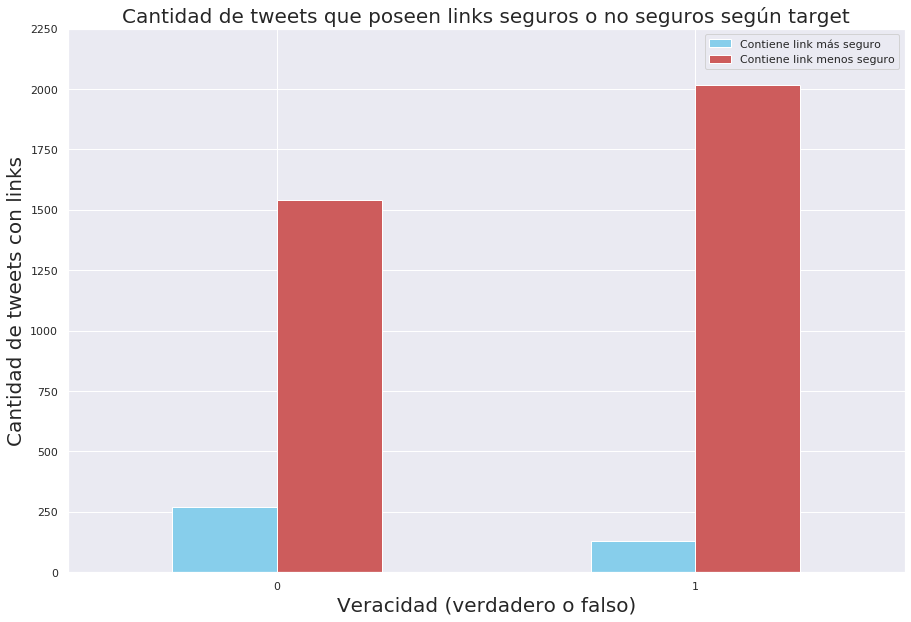

In [402]:
graph = c.plot(color=["SkyBlue","IndianRed"], kind = 'bar', figsize = (15,10), rot = 0)

graph.legend(['Contiene link más seguro','Contiene link menos seguro'], loc = 'upper right')
plt.title('Cantidad de tweets que poseen links seguros o no seguros según target', fontsize = 20)
plt.xlabel('Veracidad (verdadero o falso)', fontsize = 20)
plt.ylabel('Cantidad de tweets con links', fontsize = 20)
plt.ylim(0,2250)
plt.show()

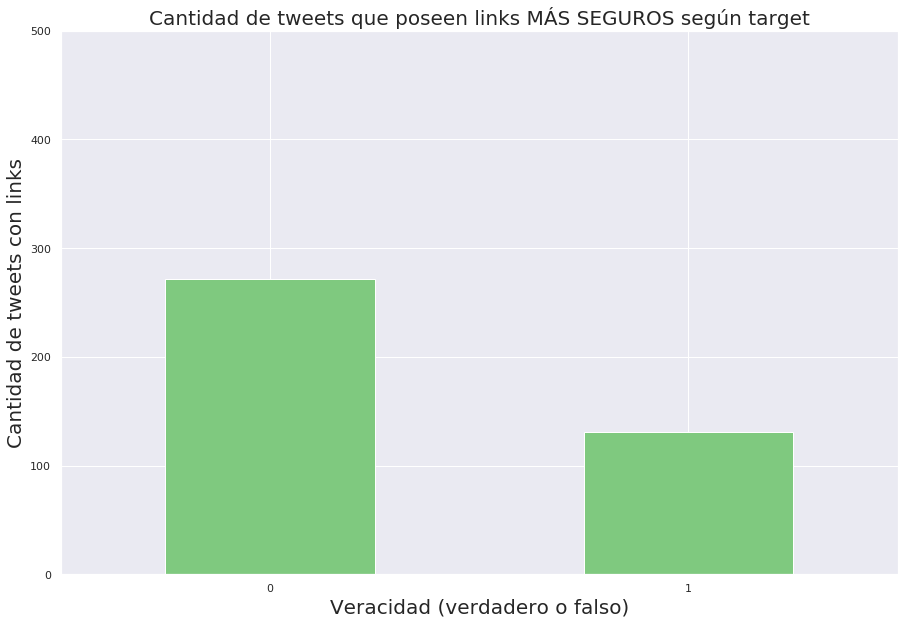

In [403]:
#Hipotesis: uno esperaria que la utilizacion de links seguros sea para los desastres reales ya que lo proveen agencias de noticias.
#Dato: Hay muy pocos links seguros en el dataset

tweets_length[tweets_length['text'].str.contains('https://')].groupby('target')['text'].count().plot(kind = 'bar', figsize = (15,10), colormap = 'Accent', rot = 0)

plt.title('Cantidad de tweets que poseen links MÁS SEGUROS según target', fontsize = 20)
plt.xlabel('Veracidad (verdadero o falso)', fontsize = 20)
plt.ylabel('Cantidad de tweets con links', fontsize = 20)
plt.ylim(0,500)
plt.show()

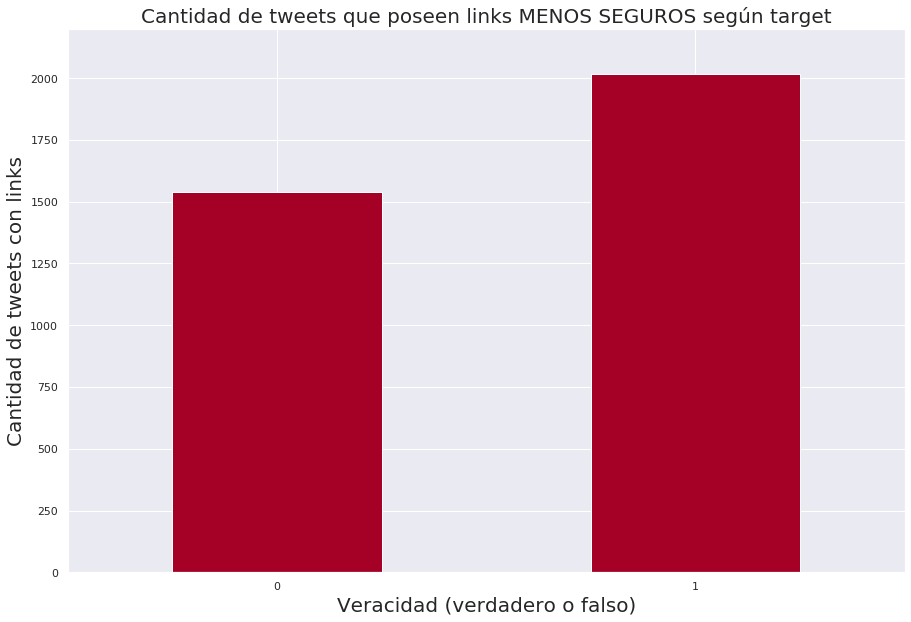

In [404]:
#Hipotesis: uno esperaria que la utilizacion de links no seguros sea para los no desastres ya que lo provee cualquiera.
#Dato: Hay muchos links inseguros en el dataset

tweets_length[tweets_length['text'].str.contains('http://')].groupby('target')['text'].count().plot(kind = 'bar', figsize = (15,10), colormap = 'RdYlBu', rot = 0)
plt.title('Cantidad de tweets que poseen links MENOS SEGUROS según target', fontsize = 20)
plt.xlabel('Veracidad (verdadero o falso)', fontsize = 20)
plt.ylabel('Cantidad de tweets con links', fontsize = 20)
plt.ylim(0,2200)
plt.show()

### Comienzo análisis de sentimiento de tweet.

Primera hipotesis: Al ser cosas noticiosas deberian ser mas neutras.

Pero, teniendo en cuenta que procesa el sentimiento.
Deberian ser neutros tendiendo a negativos ya que al ser desastres naturales son literalmente eso, desastres, y se espera el uso de ciertas palabras que no implican algo muy positivo.

Además, al informar sobre desastres naturales las palabras que describen este tipo de eventos apuntan en general a cosas más negativas.

Habría que ver como se puede dividir para relacionarlo con el target. Si hacer dos analisis por separado y comparar histogramas o promedios entre target 1 y 0 o usarlo combinado (que obtengo con esto?).

In [405]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/agustin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [406]:
sia = SentimentIntensityAnalyzer()
def return_sia_compound_values(text):
    return sia.polarity_scores(text)['compound']

tweets_feeling_1 = tweets_length.groupby('target')['text'].get_group(1).apply(lambda x: return_sia_compound_values(x))
tweets_feeling_0 = tweets_length.groupby('target')['text'].get_group(0).apply(lambda x: return_sia_compound_values(x))

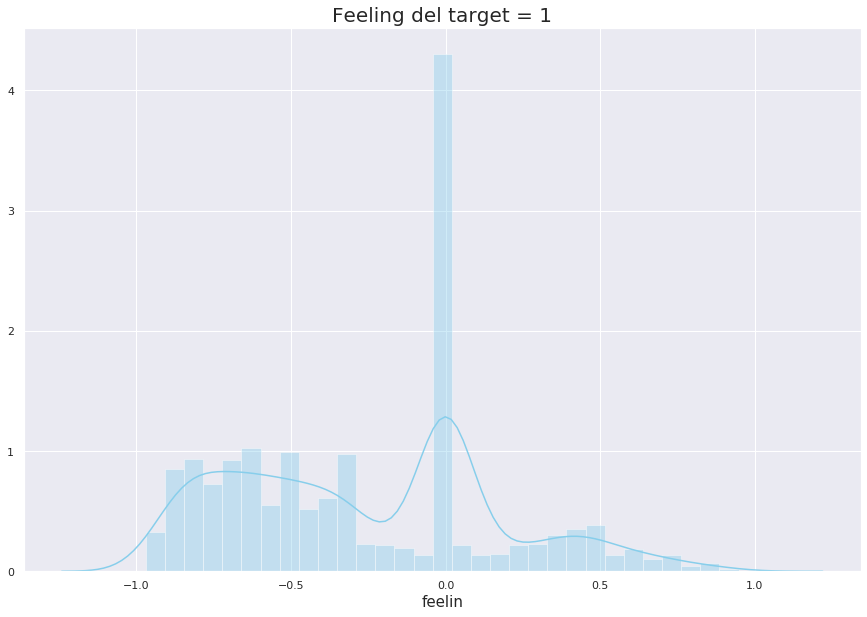

In [407]:
g = sns.distplot(tweets_feeling_1, bins = 31, color = 'SkyBlue')
g.set_title('Feeling del target = 1', fontsize = 20)
g.set_xlabel('feelin', fontsize = 15)
plt.show()

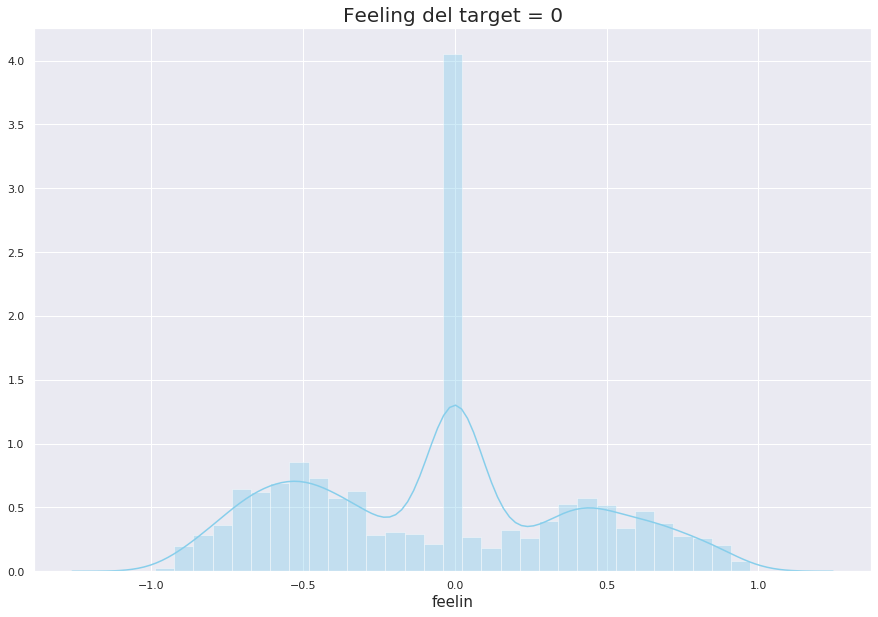

In [408]:
g = sns.distplot(tweets_feeling_0, bins = 31, color = 'SkyBlue')
g.set_title('Feeling del target = 0', fontsize = 20)
g.set_xlabel('feelin', fontsize = 15)
plt.show()

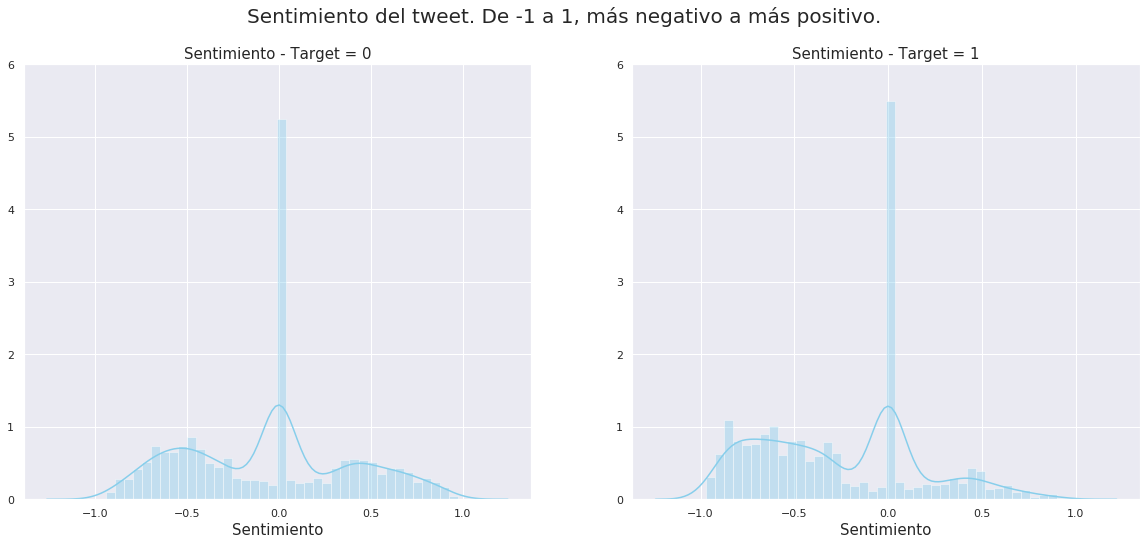

In [409]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,8))

sns.distplot(tweets_feeling_0, bins = 40, color = 'SkyBlue', ax = ax1)
ax1.set_title('Sentimiento - Target = 0', fontsize = 15)
ax1.set_xlabel('Sentimiento', fontsize = 15)

sns.distplot(tweets_feeling_1, bins = 40, color = 'SkyBlue', ax = ax2)
ax2.set_title('Sentimiento - Target = 1', fontsize = 15)
ax2.set_xlabel('Sentimiento', fontsize = 15)

ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
fig.suptitle('Sentimiento del tweet. De -1 a 1, más negativo a más positivo.', fontsize = 20)
plt.show()

### Personas mas mencionadas

In [410]:
tweets_with_mentions = tweets.loc[tweets['text'].str.contains('@'), ['text', 'target']]
mentions = tweets_with_mentions['text'].str.findall(r'@.\S*?(?=\s|[:]|$)').to_frame()
#La regex encuentra todas las palabras que empiecen con '@' y al mismo tiempo elimina los '@:' y '@ '
#El arroba se usa como expresion para indicar la hora tambien

In [411]:
mentions.head()

text
2473      [@OfficeOfRG]
2472  [@cta, @CTAFails]
2195         [@Reuters]
2194       [@SCMP_News]
2181    [@BillNeelyNBC]

In [412]:
mentions['target'] = tweets_with_mentions['target']

In [413]:
mentions.head()

text  target
2473      [@OfficeOfRG]       1
2472  [@cta, @CTAFails]       1
2195         [@Reuters]       1
2194       [@SCMP_News]       1
2181    [@BillNeelyNBC]       1

In [414]:
mentions_to_group = mentions.explode('text')

In [415]:
mentions_to_group.head()

text  target
2473  @OfficeOfRG       1
2472         @cta       1
2472    @CTAFails       1
2195     @Reuters       1
2194   @SCMP_News       1

In [416]:
mentions_grouped = mentions_to_group.groupby(['text']).agg({'text': 'count', 'target':'sum'}).nlargest(20, 'text')
mentions_grouped['fake'] = mentions_grouped['text'] - mentions_grouped['target']
mentions_grouped.columns = ['total', 'real', 'fake']

In [417]:
mentions_grouped.head()

total  real  fake
text                            
@YouTube          82    17    65
@ArianaGrande     11     0    11
@Change            9     4     5
@FoxNews           9     8     1
@POTUS             9     6     3

Text(0.5, 0, 'Account')

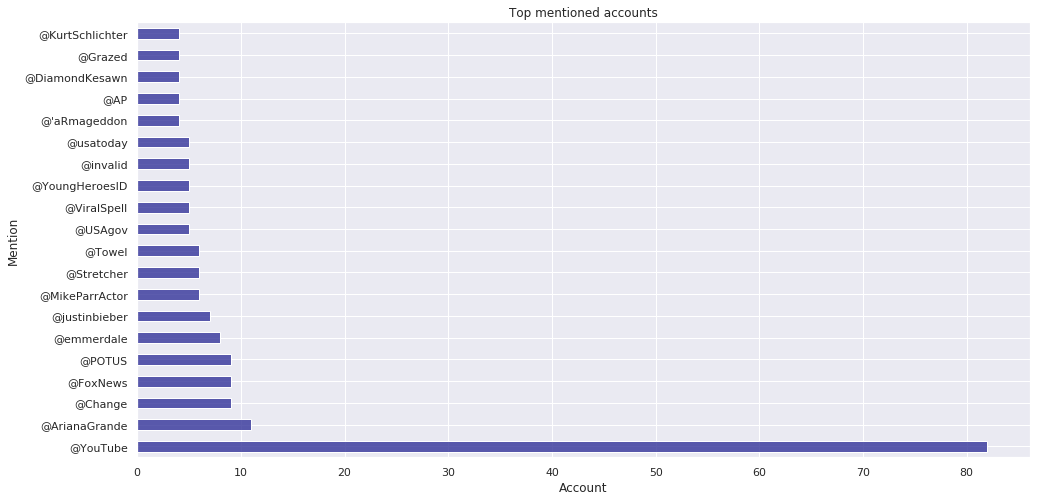

In [418]:
mentions_grouped.loc[:, 'total'].plot(kind='barh', title='Top mentioned accounts', color=(0.2, 0.2, 0.6, 0.8), figsize=(16, 8))
ax = plt.gca()
ax.set_ylabel('Mention')
ax.set_xlabel('Account')

Text(0.5, 0, 'Account')

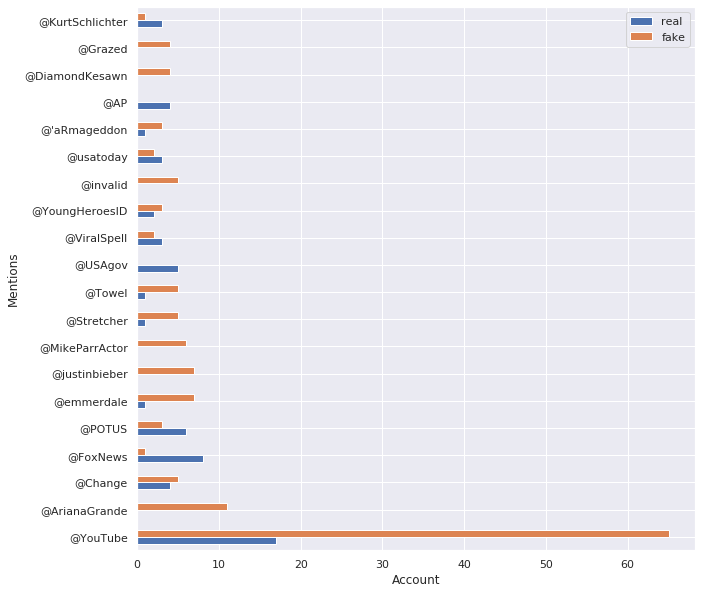

In [419]:
ax = mentions_grouped.loc[:, ['real', 'fake']].plot(kind='barh', figsize=(10, 10))
ax.set_ylabel('Mentions')
ax.set_xlabel('Account')

# LOCATION

### Top ciudades mentirosas/dicen la verdad

In [420]:
#No me importan las locaciones NAN
partial = tweets.dropna()

In [421]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4982 entries, 2171 to 111
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4982 non-null   int64  
 1   keyword        4982 non-null   object 
 2   location       4982 non-null   object 
 3   text           4982 non-null   object 
 4   target         4982 non-null   int64  
 5   hashtags       4982 non-null   object 
 6   target_mean    4982 non-null   float64
 7   keyword_count  4982 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 350.3+ KB


In [422]:
locations = partial[partial['location'].str.match(r'^([a-zA-Z,\s])*$') > 0]
locations.head()

id   keyword               location  \
2169   3111    debris               Nigeria    
2163   3104    debris  Belbroughton, England   
7505  10735  wreckage                 Mumbai   
7506  10736  wreckage                  Tokyo   
7508  10739  wreckage                 Sydney   

                                                   text  target  \
2169  Malaysia confirms plane debris washed up on Re...       1   
2163  #aerospace #exec Plane debris is from missing ...       1   
7505  Wreckage 'Conclusively Confirmed' as From MH37...       1   
7506  Wreckage Confirmed As Part of Missing Malaysia...       1   
7508  MH370 victim's family furious the media was to...       1   

                 hashtags  target_mean  keyword_count  
2169                   []          1.0           37.0  
2163  [#aerospace, #exec]          1.0           37.0  
7505                   []          1.0           36.0  
7506                   []          1.0           36.0  
7508                   []          1.0           36.0

In [423]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3946 entries, 2169 to 104
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3946 non-null   int64  
 1   keyword        3946 non-null   object 
 2   location       3946 non-null   object 
 3   text           3946 non-null   object 
 4   target         3946 non-null   int64  
 5   hashtags       3946 non-null   object 
 6   target_mean    3946 non-null   float64
 7   keyword_count  3946 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 277.5+ KB


In [424]:
locations['location'] = locations['location'].str.lower()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [425]:
locations.head()

id   keyword               location  \
2169   3111    debris               nigeria    
2163   3104    debris  belbroughton, england   
7505  10735  wreckage                 mumbai   
7506  10736  wreckage                  tokyo   
7508  10739  wreckage                 sydney   

                                                   text  target  \
2169  Malaysia confirms plane debris washed up on Re...       1   
2163  #aerospace #exec Plane debris is from missing ...       1   
7505  Wreckage 'Conclusively Confirmed' as From MH37...       1   
7506  Wreckage Confirmed As Part of Missing Malaysia...       1   
7508  MH370 victim's family furious the media was to...       1   

                 hashtags  target_mean  keyword_count  
2169                   []          1.0           37.0  
2163  [#aerospace, #exec]          1.0           37.0  
7505                   []          1.0           36.0  
7506                   []          1.0           36.0  
7508                   []          1.0           36.0

In [426]:
#10 lugares con mas tweets
top_10_locations = locations['location'].value_counts().nlargest(20).to_frame()
top_10_locations

location
usa                   104
new york               75
united states          50
london                 49
canada                 33
uk                     29
worldwide              29
los angeles, ca        28
nigeria                25
india                  24
mumbai                 22
washington, dc         21
kenya                  21
chicago, il            19
everywhere             19
australia              18
california             18
new york, ny           16
nyc                    15
california, usa        15

Text(0.5, 0, 'Location')

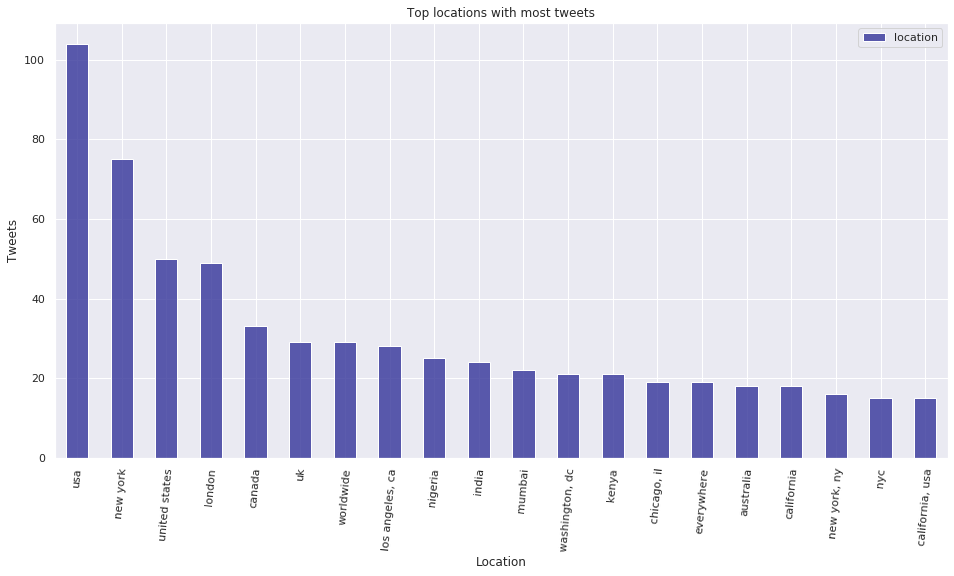

In [427]:
top_10_locations.plot(kind='bar',  rot=85, title='Top locations with most tweets', color=(0.2, 0.2, 0.6, 0.8), figsize=(16, 8))
ax = plt.gca()
ax.set_ylabel('Tweets')
ax.set_xlabel('Location')

In [428]:
locations.head()

id   keyword               location  \
2169   3111    debris               nigeria    
2163   3104    debris  belbroughton, england   
7505  10735  wreckage                 mumbai   
7506  10736  wreckage                  tokyo   
7508  10739  wreckage                 sydney   

                                                   text  target  \
2169  Malaysia confirms plane debris washed up on Re...       1   
2163  #aerospace #exec Plane debris is from missing ...       1   
7505  Wreckage 'Conclusively Confirmed' as From MH37...       1   
7506  Wreckage Confirmed As Part of Missing Malaysia...       1   
7508  MH370 victim's family furious the media was to...       1   

                 hashtags  target_mean  keyword_count  
2169                   []          1.0           37.0  
2163  [#aerospace, #exec]          1.0           37.0  
7505                   []          1.0           36.0  
7506                   []          1.0           36.0  
7508                   []          1.0           36.0

In [429]:
by_location = locations.groupby(['location']).agg({'target':['count', 'sum']})
level_0 = by_location.columns.get_level_values(0)
level_1 = by_location.columns.get_level_values(1)
by_location.columns = level_0 + '_' + level_1
by_location.reset_index(inplace=True)
by_location.head()

location  target_count  target_sum
0                                     1           1
1                glasgow              1           0
2    melbourne, australia             1           0
3                    news             1           1
4                 alberta             1           1

In [430]:
by_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      2271 non-null   object
 1   target_count  2271 non-null   int64 
 2   target_sum    2271 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 53.4+ KB


In [431]:
import os.path
if(not os.path.isfile('locations.csv')):
    get_geodata()

def get_geodata():
    from geopy.geocoders import Nominatim
    from tqdm import tqdm
    from geopy.extra.rate_limiter import RateLimiter
    geolocator = Nominatim(user_agent="mile.marchese@gmail.com")
    tqdm.pandas()
    geocode = RateLimiter(geolocator.geocode, min_delay_seconds=2, max_retries=0)
    by_location['geodata'] = by_location['location'].progress_apply(geocode)
    by_location['address'] = by_location['geodata'].apply(lambda loc: loc.address if loc else None)
    by_location['point'] = by_location['geodata'].apply(lambda loc: tuple(loc.point) if loc else None)
    by_location.to_csv('locations.csv', index=False)

In [432]:
address = pd.read_csv('locations.csv', usecols=['location', 'target_count', 'target_sum', 'address']) 
address.head()

location  target_count  target_sum  \
0                                     1           1   
1                glasgow              1           0   
2    melbourne, australia             1           0   
3                    news             1           1   
4                 alberta             1           1   

                                             address  
0                                                NaN  
1  Glasgow, Glasgow City, Scotland, G2 9SA, Unite...  
2             City of Melbourne, Victoria, Australia  
3  34375, Abbotsford Centre, Abbotsford, Fraser V...  
4                                    Alberta, Canada

In [433]:
#Hay 374 que geopy no encontró
address.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271 entries, 0 to 2270
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   location      2271 non-null   object
 1   target_count  2271 non-null   int64 
 2   target_sum    2271 non-null   int64 
 3   address       1880 non-null   object
dtypes: int64(2), object(2)
memory usage: 71.1+ KB


In [434]:
#Se puede correr de nuevo geopy 
not_found_addr = address[address['address'].isnull()]
not_found_addr.head()

location  target_count  target_sum address
0                                              1           1     NaN
8                          indiana             1           0     NaN
9                     jariana town             1           0     NaN
12   nevada carson city,freeman st             1           1     NaN
16                         nxgerxa             1           0     NaN

In [435]:
address['address'].describe()

count                                   1880
unique                                  1430
top       New York, United States of America
freq                                      15
Name: address, dtype: object

In [436]:
by_address = address.groupby(['address']).agg({'target_count':'sum', 'target_sum': 'sum'\
                                               , 'location': lambda x: "%s" % '-'.join(set(x))}).reset_index()
by_address.head()

address  target_count  \
0  (B-40);Terrassa nord;Matadepera, Autopista Bar...             1   
1  1, Route Y, Lede, Ripley County, Missouri, 639...             1   
2  1, South Rent Car Road, East Haven, Houston, H...             1   
3  188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...             1   
4  2551, Woodcreek Oaks Boulevard, Roseville, Pla...             1   

   target_sum                     location  
0           0                         prov  
1           1                 im in route   
2           1               in the shadows  
3           0                       a sofa  
4           0  woodcreek hs, roseville, ca

In [437]:
by_address.columns = ['address', 'total', 'real', 'location_list']

In [438]:
by_address['fake'] = by_address['total'] - by_address['real']
by_address.head()

address  total  real  \
0  (B-40);Terrassa nord;Matadepera, Autopista Bar...      1     0   
1  1, Route Y, Lede, Ripley County, Missouri, 639...      1     1   
2  1, South Rent Car Road, East Haven, Houston, H...      1     1   
3  188, Շահումյան փողոց, Գյումրի, Շիրակի մարզ, 31...      1     0   
4  2551, Woodcreek Oaks Boulevard, Roseville, Pla...      1     0   

                 location_list  fake  
0                         prov     1  
1                 im in route      0  
2               in the shadows     0  
3                       a sofa     1  
4  woodcreek hs, roseville, ca     1

In [439]:
by_address.describe()

total         real         fake
count  1430.000000  1430.000000  1430.000000
mean      2.461538     1.100699     1.360839
std       7.133800     3.632477     3.987893
min       1.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     1.000000     1.000000
75%       2.000000     1.000000     1.000000
max     168.000000   103.000000    98.000000

In [440]:
#10 ciudades que mas reales tienen
most_real = by_address.nlargest(10, 'real').loc[:, ['address', 'real']].set_index('address')
most_real

real
address                                                 
United States                                        103
New York, United States of America                    40
London, Greater London, England, SW1A 2DX, Unit...    26
Mumbai, Mumbai City, Maharashtra, India               22
Nigeria                                               22
United Kingdom                                        20
Washington, District of Columbia, 20500, United...    19
भारत - India                                          19
Calgary, Alberta, Canada                              18
California, United States of America                  18

Text(0, 0.5, 'Location')

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2349 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2366 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2352 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning:

Glyph 2340 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 2349 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Glyph 2366 missing from current font.

/home/agustin/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning:

Gly

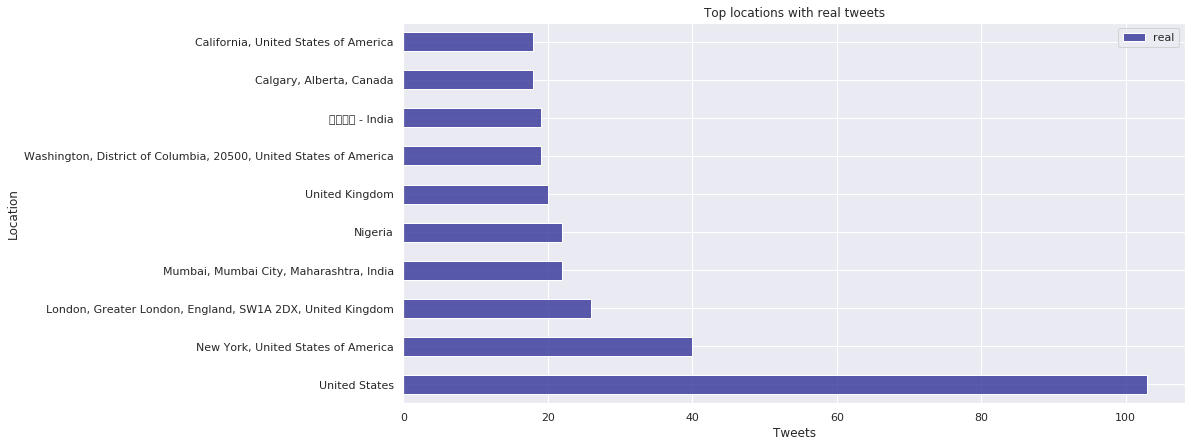

In [441]:
most_real.plot(kind='barh',  rot=0, title='Top locations with real tweets', color=(0.2, 0.2, 0.6, 0.8), figsize=(14, 7))
ax = plt.gca()
ax.set_xlabel('Tweets')
ax.set_ylabel('Location')

In [442]:
#10 ciudades que mas falsos tienen
most_fake = by_address.nlargest(10, 'fake').loc[:,['address', 'fake']].set_index('address')
most_fake

fake
address                                                 
New York, United States of America                    98
United States                                         65
London, Greater London, England, SW1A 2DX, Unit...    49
Los Angeles, Los Angeles County, California, Un...    32
California, United States of America                  24
United Kingdom                                        24
Canada                                                20
Texas, United States of America                       20
Chicago, Cook County, Illinois, United States o...    19
Atlanta, Fulton County, Georgia, United States ...    18

Text(0, 0.5, 'Location')

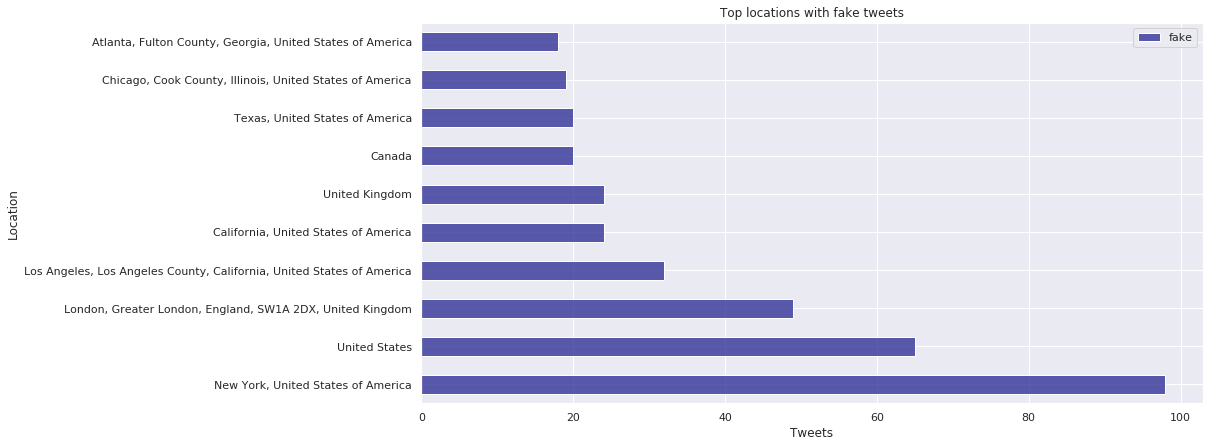

In [443]:
most_fake.plot(kind='barh',  rot=0, title='Top locations with fake tweets', color=(0.2, 0.2, 0.6, 0.8), figsize=(14, 7))
ax = plt.gca()
ax.set_xlabel('Tweets')
ax.set_ylabel('Location')

In [444]:
by_address.describe()

total         real         fake
count  1430.000000  1430.000000  1430.000000
mean      2.461538     1.100699     1.360839
std       7.133800     3.632477     3.987893
min       1.000000     0.000000     0.000000
25%       1.000000     0.000000     0.000000
50%       1.000000     1.000000     1.000000
75%       2.000000     1.000000     1.000000
max     168.000000   103.000000    98.000000

### Relacion real-falso con location, keyword vacías

In [445]:
tweets.head()

id     keyword            location  \
2446  3512  derailment                 NaN   
2467  3535  derailment                 NaN   
2173  3116      debris                 NaN   
2172  3115      debris                 NaN   
2171  3114      debris  46.950109,7.439469   

                                                   text  target  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2171  How Missing JetÛªs Debris Could Have Floated ...       1   

             hashtags  target_mean  keyword_count  
2446  [#ModiMinistry]          1.0           31.0  
2467               []          1.0           31.0  
2173               []          1.0           37.0  
2172               []          1.0           37.0  
2171               []          1.0           37.0

In [446]:
no_location = tweets[tweets['location'].isnull()]
no_keyword = tweets[tweets['keyword'].isnull()]

In [447]:
no_location.head()

id     keyword location  \
2446  3512  derailment      NaN   
2467  3535  derailment      NaN   
2173  3116      debris      NaN   
2172  3115      debris      NaN   
2170  3112      debris      NaN   

                                                   text  target  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2170  #?? #???? #??? #??? MH370: Aircraft debris fou...       1   

                      hashtags  target_mean  keyword_count  
2446           [#ModiMinistry]          1.0           31.0  
2467                        []          1.0           31.0  
2173                        []          1.0           37.0  
2172                        []          1.0           37.0  
2170  [#??, #????, #???, #???]          1.0           37.0

In [448]:
no_keyword.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target               hashtags  target_mean  keyword_count  
0       1          [#earthquake]          NaN            NaN  
1       1                     []          NaN            NaN  
2       1                     []          NaN            NaN  
3       1           [#wildfires]          NaN            NaN  
4       1  [#Alaska, #wildfires]          NaN            NaN

In [449]:
no_location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 2446 to 7612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2452 non-null   int64  
 1   keyword        2396 non-null   object 
 2   location       0 non-null      object 
 3   text           2452 non-null   object 
 4   target         2452 non-null   int64  
 5   hashtags       2452 non-null   object 
 6   target_mean    2396 non-null   float64
 7   keyword_count  2396 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 172.4+ KB


In [450]:
no_keyword.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 0 to 7612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             56 non-null     int64  
 1   keyword        0 non-null      object 
 2   location       0 non-null      object 
 3   text           56 non-null     object 
 4   target         56 non-null     int64  
 5   hashtags       56 non-null     object 
 6   target_mean    0 non-null      float64
 7   keyword_count  0 non-null      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ KB


In [451]:
no_location['len'] = no_location['text'].str.len()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [452]:
no_keyword['len'] = no_keyword['text'].str.len()

/home/agustin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [453]:
no_location.head()

id     keyword location  \
2446  3512  derailment      NaN   
2467  3535  derailment      NaN   
2173  3116      debris      NaN   
2172  3115      debris      NaN   
2170  3112      debris      NaN   

                                                   text  target  \
2446  #ModiMinistry Madhya Pradesh Train Derailment:...       1   
2467  http://t.co/BAGEF9lFGT 25 killed 50 injured in...       1   
2173  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2172  RÌ©union Debris Is Almost Surely From Flight 3...       1   
2170  #?? #???? #??? #??? MH370: Aircraft debris fou...       1   

                      hashtags  target_mean  keyword_count  len  
2446           [#ModiMinistry]          1.0           31.0  100  
2467                        []          1.0           31.0  106  
2173                        []          1.0           37.0  102  
2172                        []          1.0           37.0  102  
2170  [#??, #????, #???, #???]          1.0           37.0  124

In [454]:
no_keyword.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target               hashtags  target_mean  keyword_count  len  
0       1          [#earthquake]          NaN            NaN   69  
1       1                     []          NaN            NaN   38  
2       1                     []          NaN            NaN  133  
3       1           [#wildfires]          NaN            NaN   65  
4       1  [#Alaska, #wildfires]          NaN            NaN   88

In [455]:
no_location['target'].value_counts()

0    1430
1    1022
Name: target, dtype: int64

In [456]:
no_keyword['target'].value_counts()

1    37
0    19
Name: target, dtype: int64